In [1]:
!sshfs -o reconnect,ServerAliveInterval=120,ServerAliveCountMax=3 rennes.g5k:/srv/storage/empenn@storage2.rennes.grid5000.fr/private/ymerel /home/ymerel/storage

fusermount3: failed to access mountpoint /home/ymerel/storage: Permission denied


In [2]:
import os

datadir = os.path.join('data')
ds_path = os.path.join(datadir, 'normalized_dataset.csv')
corr_path = os.path.join(datadir, 'correlations.csv')
corr_func = 'spearman'
basedir = "/home/ymerel/storage/results/"
jobname = "auditory_sosym"
result_path = f"{basedir}{jobname}"

# Load data

In [3]:
import numpy as np
import pandas as pd

dataset = pd.read_csv(ds_path, delimiter=';')

print(f"{len(dataset)} configs in dataset")

correlations = pd.read_csv(corr_path, delimiter=';')
print(f"{len(correlations)} correlations in matrix")

matrix = correlations.pivot(index='source', columns='target', values=corr_func).fillna(1.0)

dataset.head(1010)

1001 configs in dataset
1002001 correlations in matrix


slice_timing_correction/ref_slice/middle  distorsion_correction  \
0                                        False                  False   
1                                        False                  False   
2                                         True                  False   
3                                        False                  False   
4                                        False                  False   
...                                        ...                    ...   
996                                       True                  False   
997                                      False                  False   
998                                      False                  False   
999                                       True                  False   
1000                                     False                  False   

      signal_modeling/temporal_noise_autocorrelation/FAST  \
0                                                  True     
1                                                  True     
2                                                  True     
3                                                  True     
4                                                  True     
...                                                 ...     
996                                               False     
997                                               False     
998                                               False     
999                                                True     
1000                                              False     

      slice_timing_correction  \
0                       False   
1                        True   
2                        True   
3                        True   
4                        True   
...                       ...   
996                      True   
997                     False   
998                      True   
999                      True   
1000                     True   

      signal_modeling/temporal_noise_autocorrelation/AR1  \
0                                                 False    
1                                                 False    
2                                                 False    
3                                                 False    
4                                                 False    
...                                                 ...    
996                                                True    
997                                                True    
998                                                True    
999                                               False    
1000                                               True    

      spatial_normalization/algorithm/linear  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   
...                                      ...   
996                                    False   
997                                    False   
998                                    False   
999                                    False   
1000                                   False   

      motion_correction_realignment/register_to/mean  \
0                                               True   
1                                              False   
2                                              False   
3                                              False   
4                                               True   
...                                              ...   
996                                             True   
997                                             True   
998                                            False   
999                                             True   
1000                                            True   

      signal_modeling/hrf/te

# Compute dendogram, medoids and anti-medoids

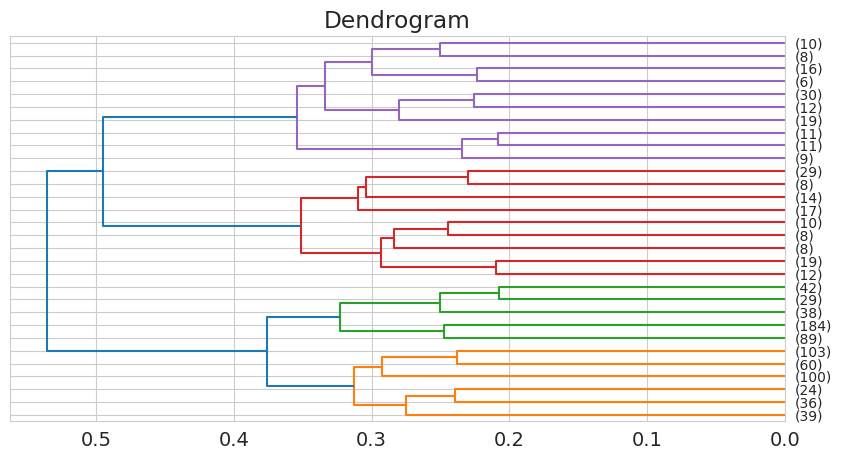

[31] clusters for t=0.2


In [11]:
from utils import clusterize_hierch, predict_clusters, get_cluster_distance_densities, get_cluster_cophenetic,get_cluster_silhouette, get_cluster_inertia, get_davies_bouldin, get_medoids, get_antimedoids
from plot_utils import plot_brain
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

all_results = []

threshold = 0.20

# cluster on whole dataset
ds, distance_matrix, Z, clusters = clusterize_hierch(dataset, correlations, dataset['id'], None, corr_func, threshold)

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='lastp', distance_sort=True, orientation='left')
plt.title('Dendrogram')
plt.show()

medoids = get_medoids(distance_matrix, clusters)
# sort by cluster label
medoids = {k: medoids[k] for k in sorted(medoids.keys())} 
antimedoids = get_antimedoids(distance_matrix, clusters)

print(f'[{len(medoids.items())}] clusters for t={threshold}')

# Plot clusters (medoids, antimedoids)

Cluster [1] - Correlation to ref [0.6071613373156838] - Medoid [d62a51506b42ed3fcdc2ab545e074e4378c496ebd65772131d058c9ab855775a]


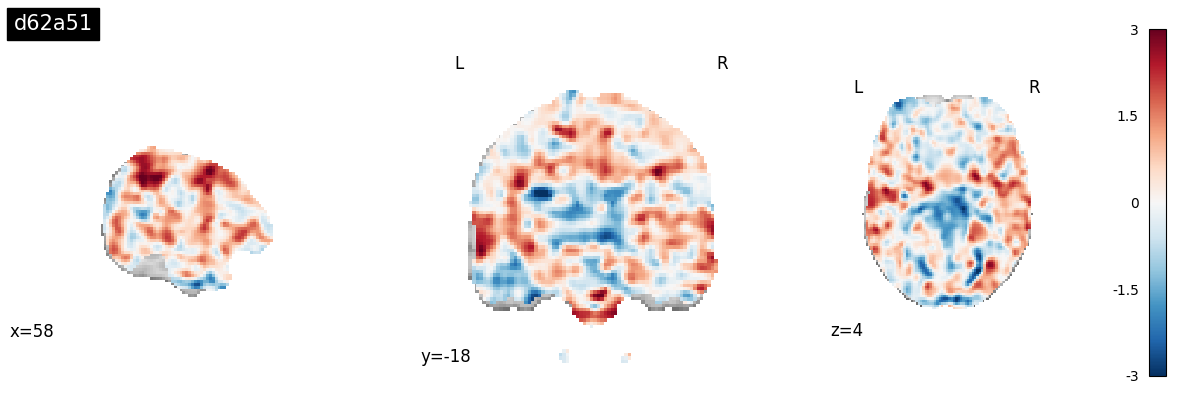

Cluster [1] - Antimedoid


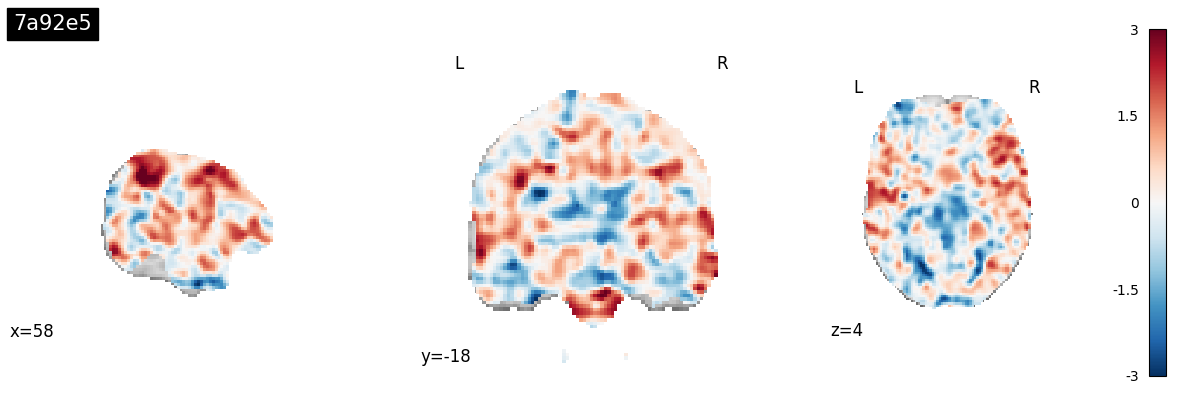

Cluster [2] - Correlation to ref [0.8281181288721113] - Medoid [c19e83fa6250b27b41702155700c1b033c09c1884787039d97a477e2f156b745]


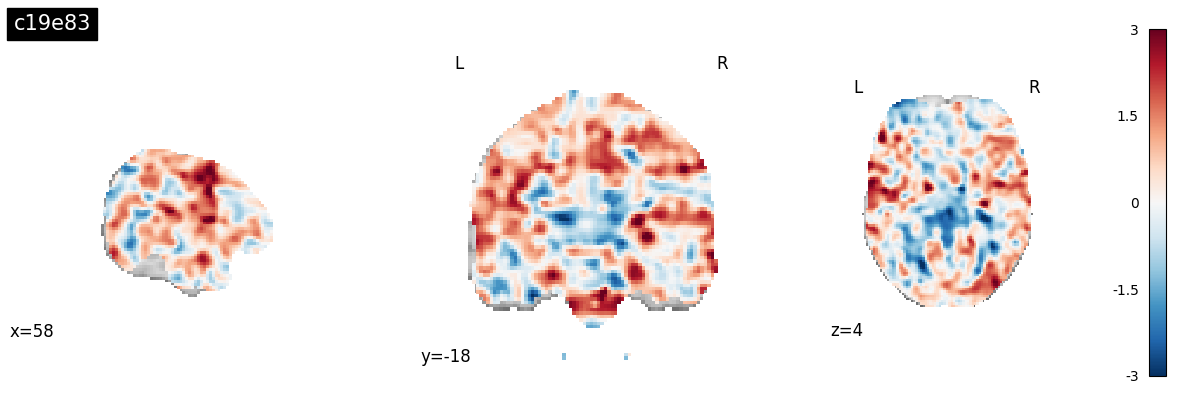

Cluster [2] - Antimedoid


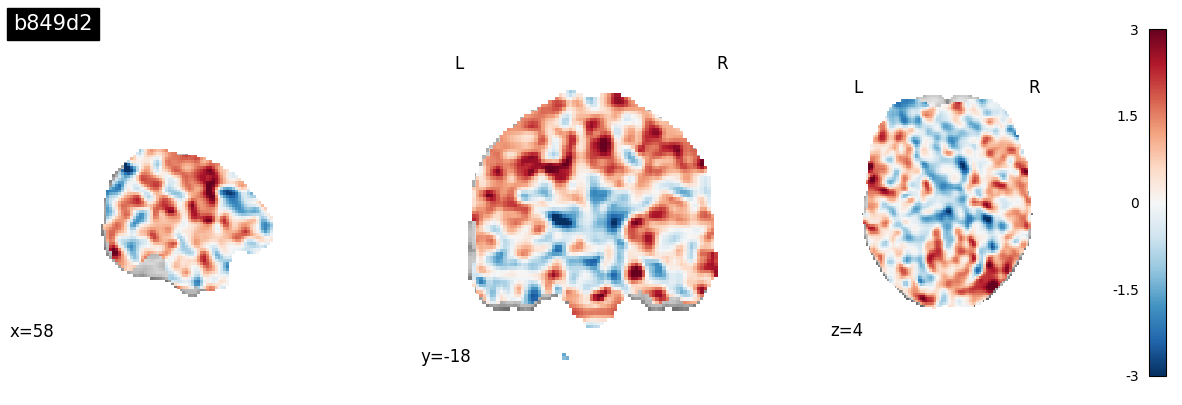

Cluster [3] - Correlation to ref [0.5191154590919018] - Medoid [1856a5c7995b9e96041ecb95ec05830d82ad4b28c0fbc6c9ff02eac11df39c4c]


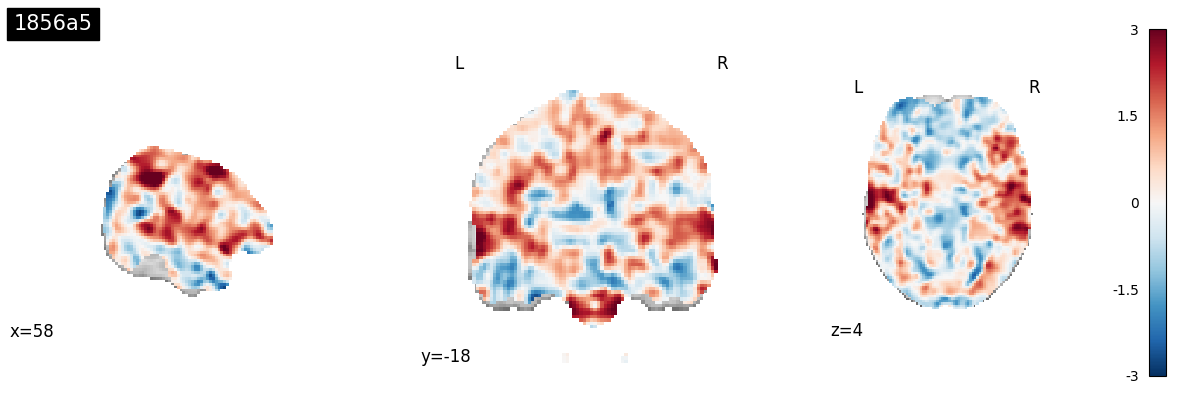

Cluster [3] - Antimedoid


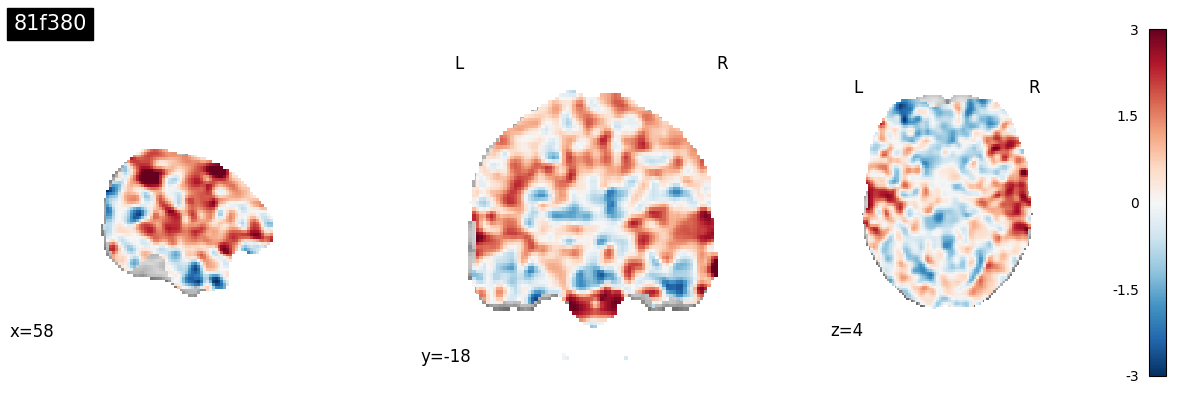

Cluster [4] - Correlation to ref [0.7027360962539648] - Medoid [97c77a3878fc80c0c7c226dc485f9aa0d2b892e3c6d58e76640f6c4bb5c3e79d]


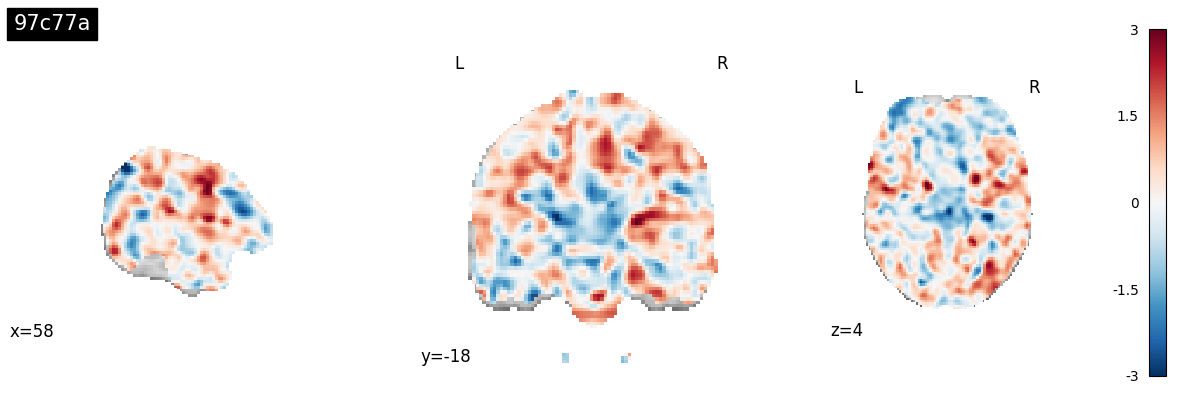

Cluster [4] - Antimedoid


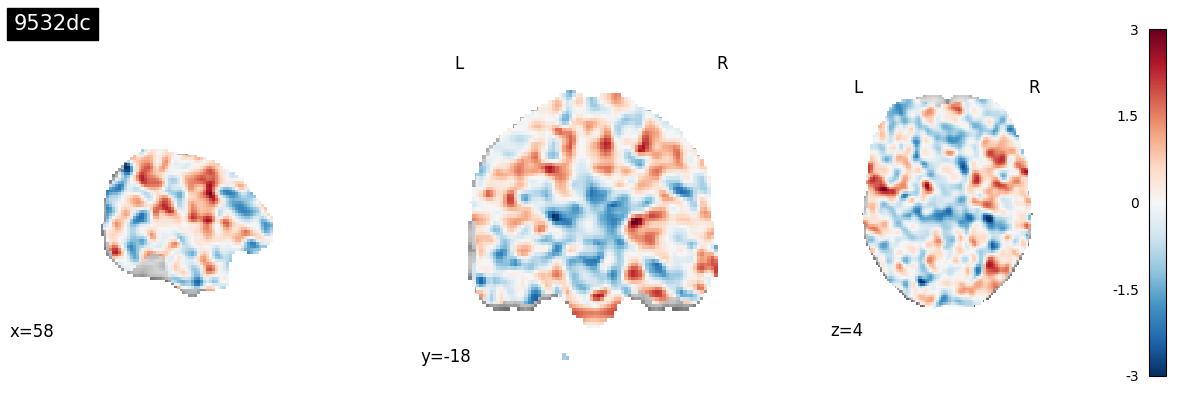

Cluster [5] - Correlation to ref [0.6312656695158215] - Medoid [36409855586faacc4442ff8f04a4bebb7ce6a9f9e1d02b462a68b535da97cd2b]


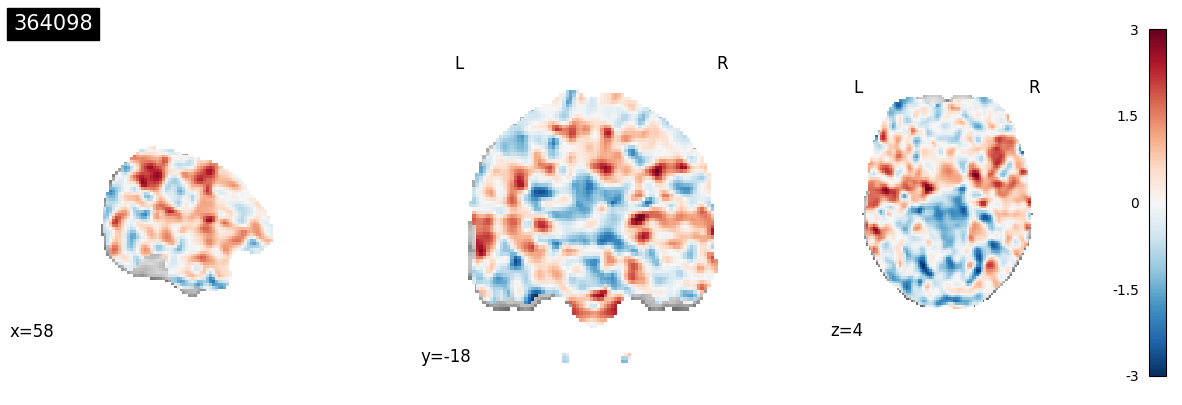

Cluster [5] - Antimedoid


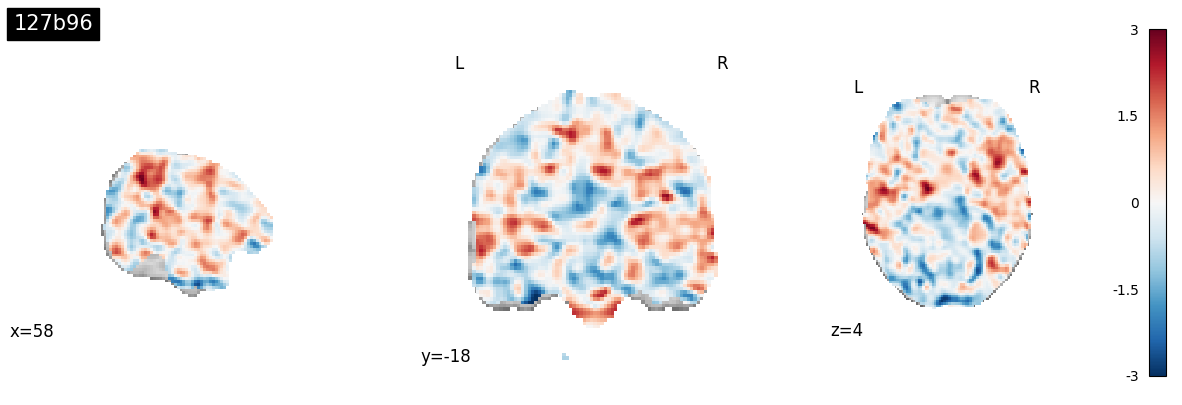

Cluster [6] - Correlation to ref [0.584599444584096] - Medoid [0b87e488f7aa6f1c4c32722051b9c4dbd1234f8bb8b48edab1320aeb9974795b]


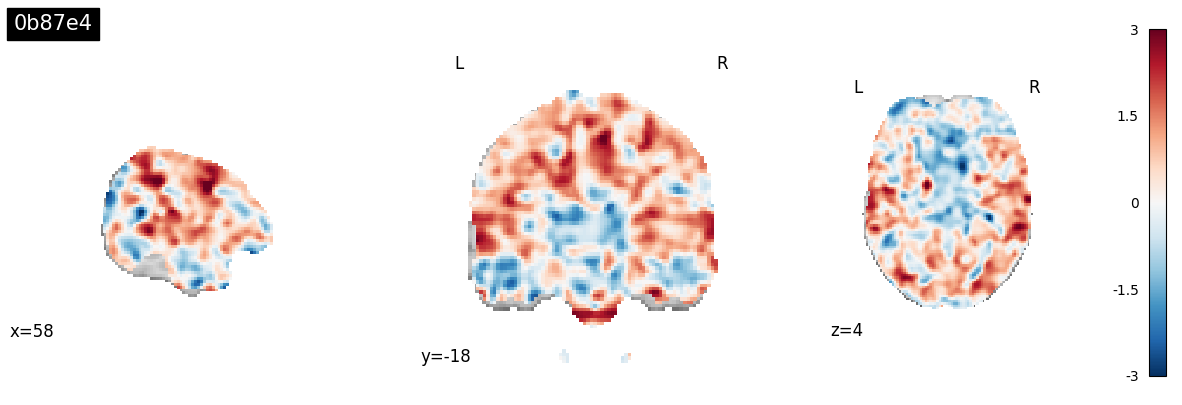

Cluster [6] - Antimedoid


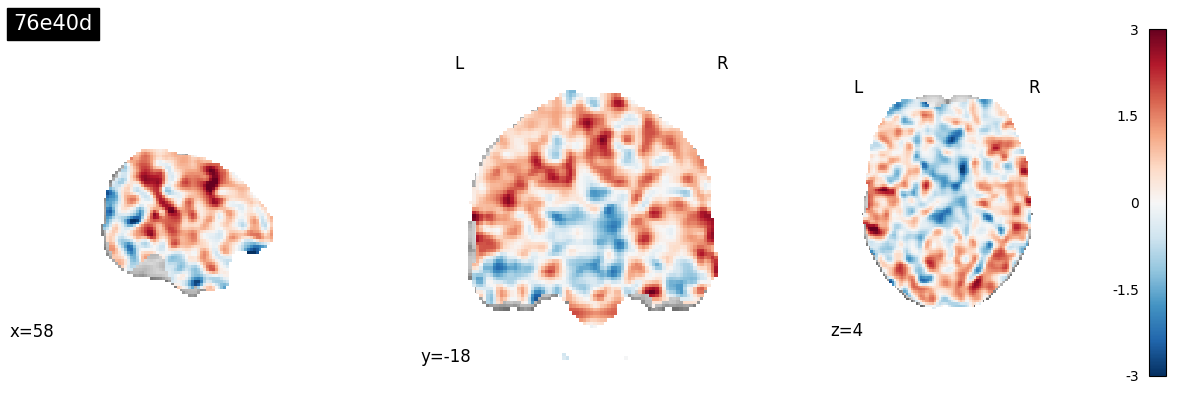

Cluster [7] - Correlation to ref [0.4871427672414352] - Medoid [e0cd7ce487117e6315ebdbd4b9126c80848e5b68d8143f1f6ce538e5bb79eef9]


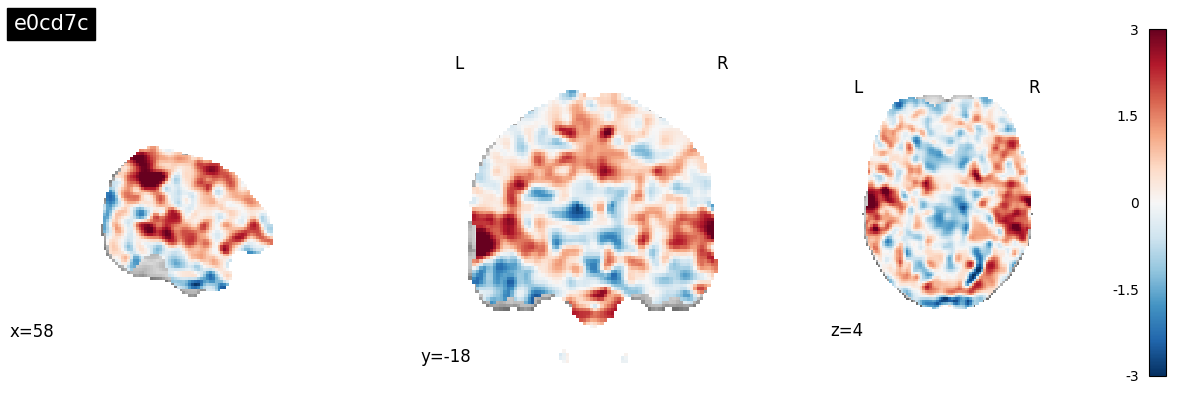

Cluster [7] - Antimedoid


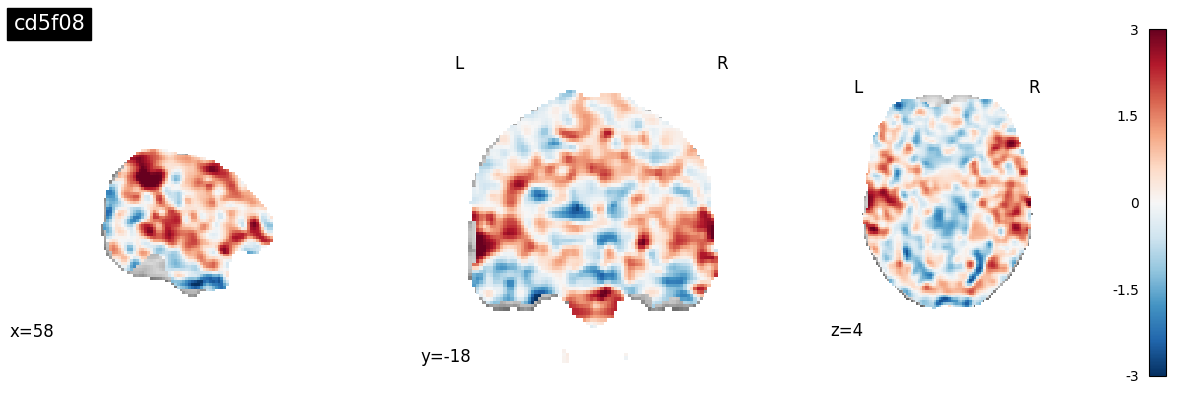

Cluster [8] - Correlation to ref [0.6505246954976733] - Medoid [e57a40a5acafc92f72a970beb0cd0617251977317023a47a007b154388a84629]


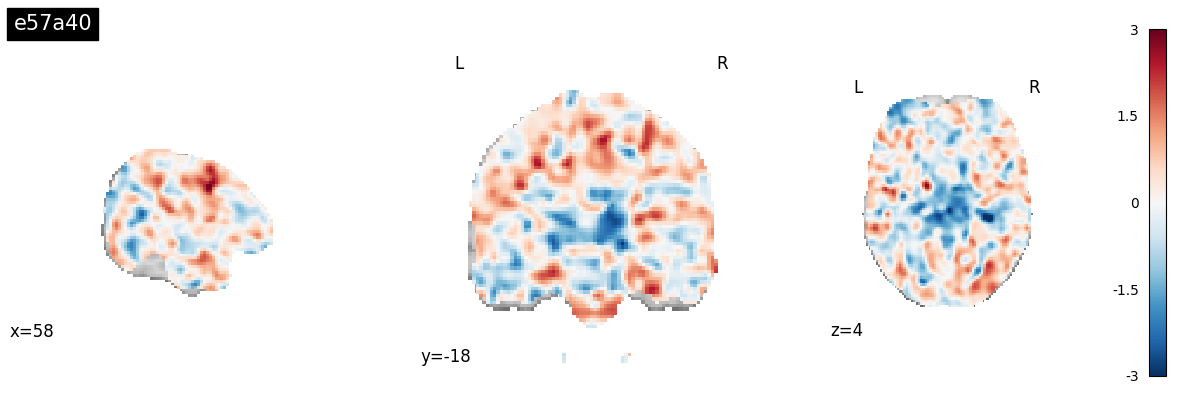

Cluster [8] - Antimedoid


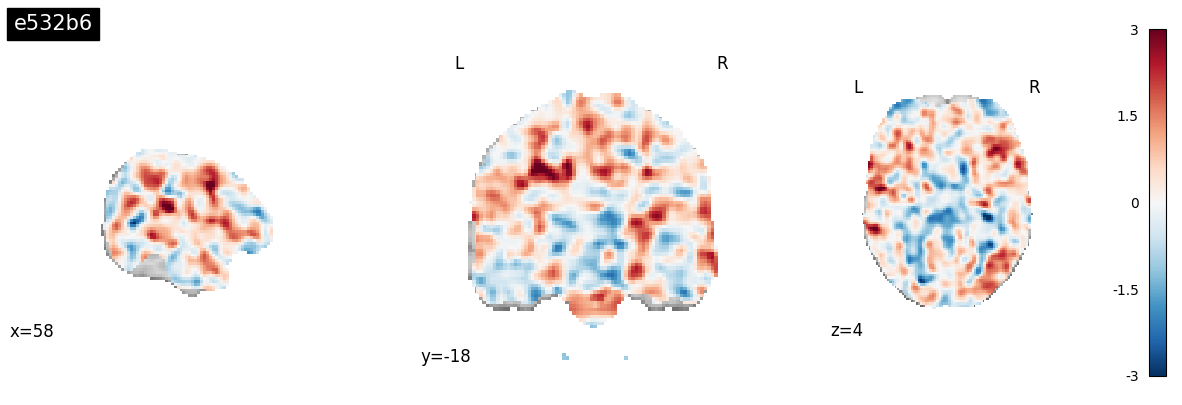

Cluster [9] - Correlation to ref [0.5671274042418448] - Medoid [878ef2ae922e21f7d403fd2c29a63ebe1f882d050a67f0906f92b3d1175ef738]


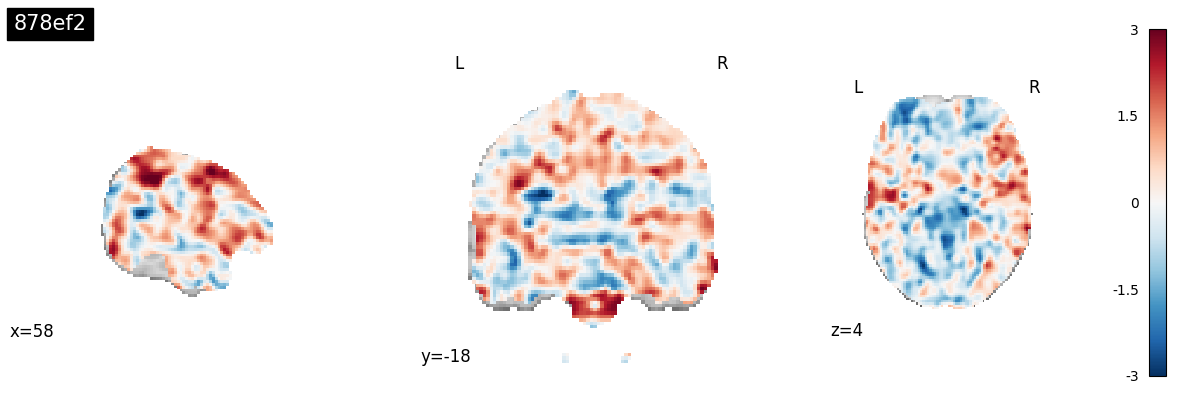

Cluster [9] - Antimedoid


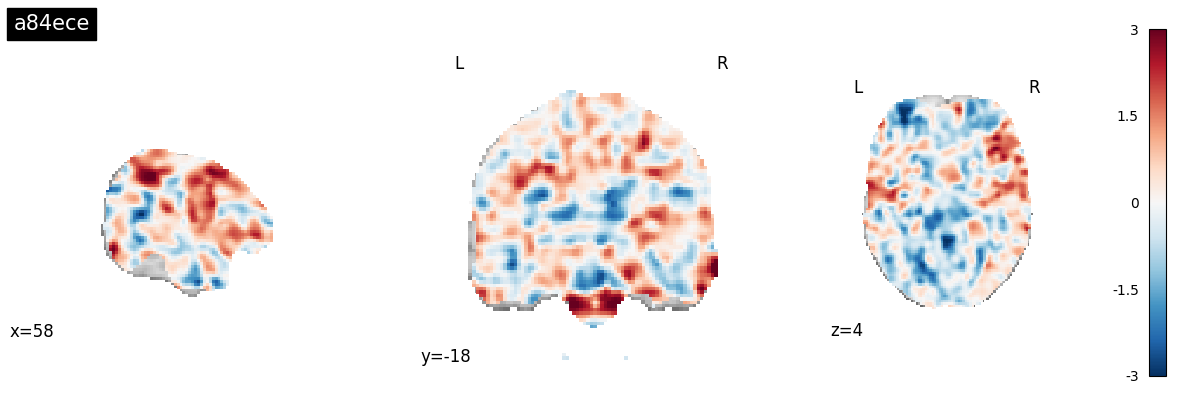

Cluster [10] - Correlation to ref [0.5917281285340552] - Medoid [cde0bf19d30430c244f9738f38b87229a3176306ad1dce51343f44ad060ee5d2]


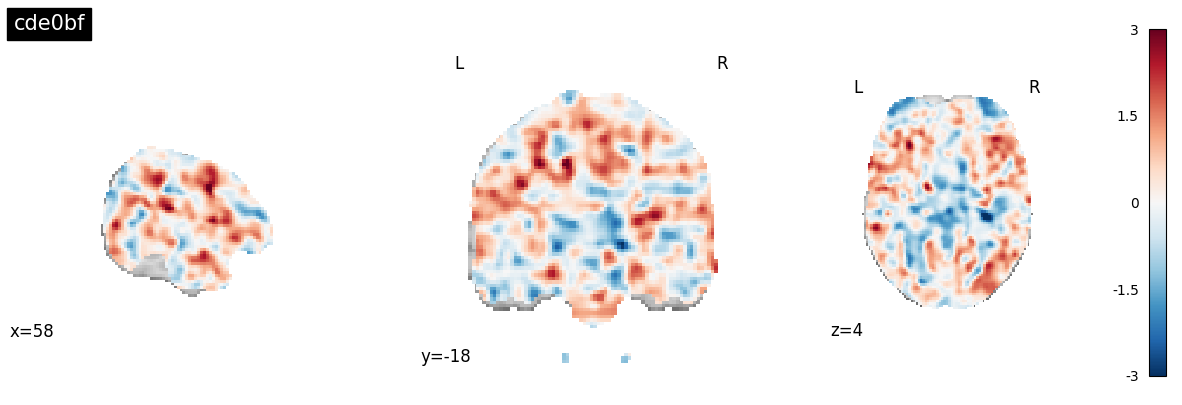

Cluster [10] - Antimedoid


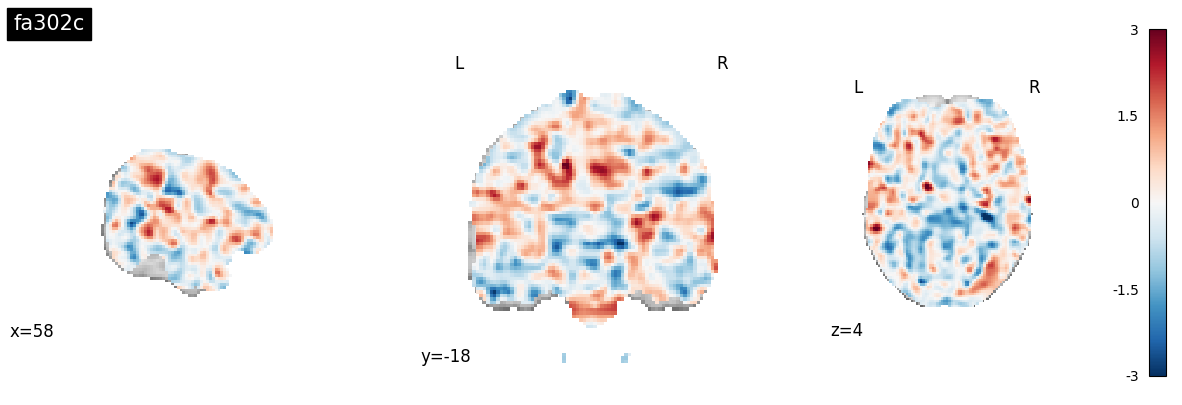

Cluster [11] - Correlation to ref [0.5461558564051158] - Medoid [74613f98aa2e09851a6792e02c5279a8ac8c52cad7145c65793de56fe808eec7]


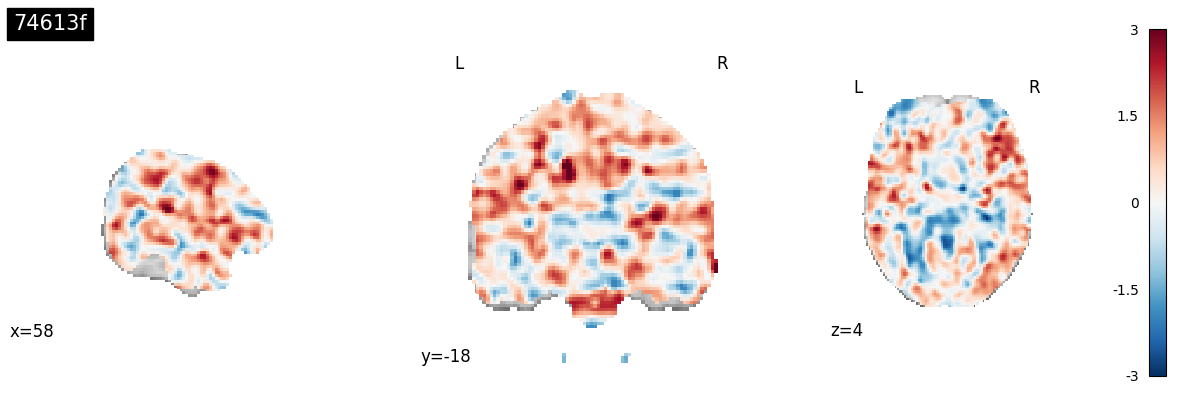

Cluster [11] - Antimedoid


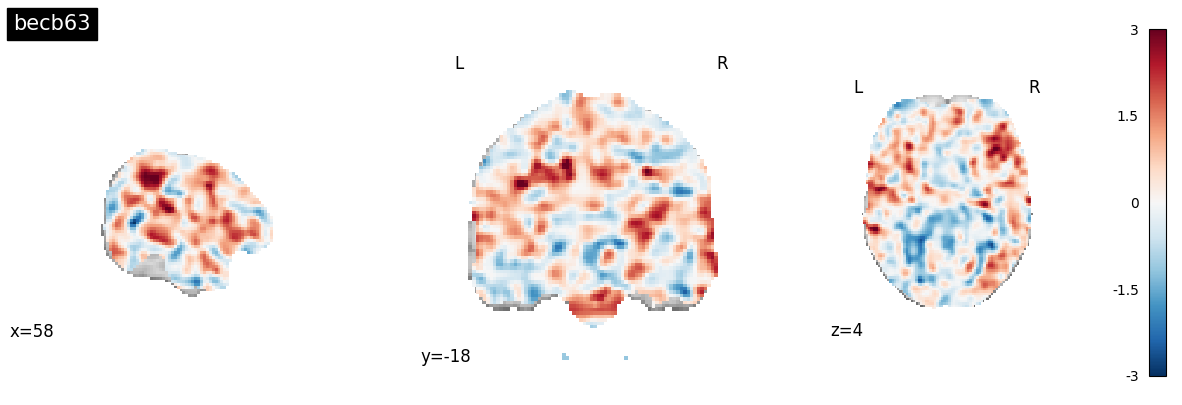

Cluster [12] - Correlation to ref [0.5441200014846633] - Medoid [f325f198ee869a7e4379976830f8d6ce7ec249bbb4c26d345839aff33a903b2b]


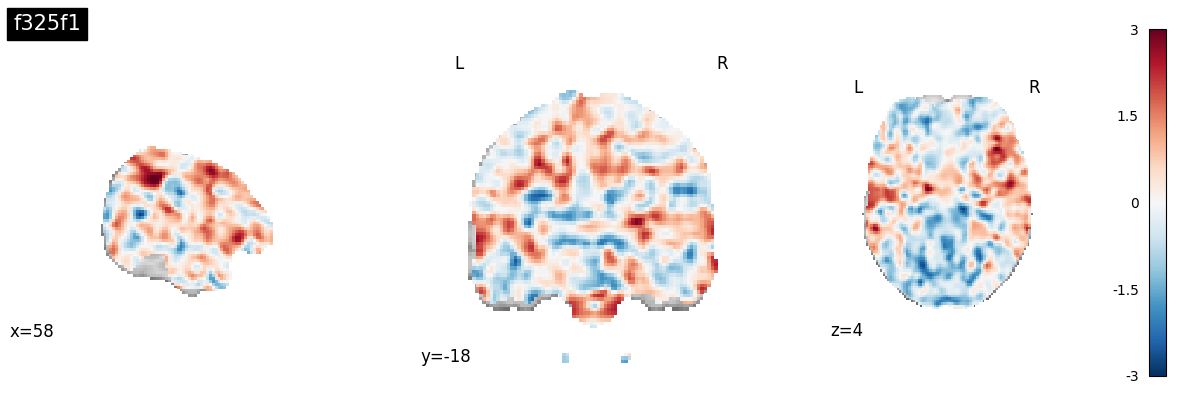

Cluster [12] - Antimedoid


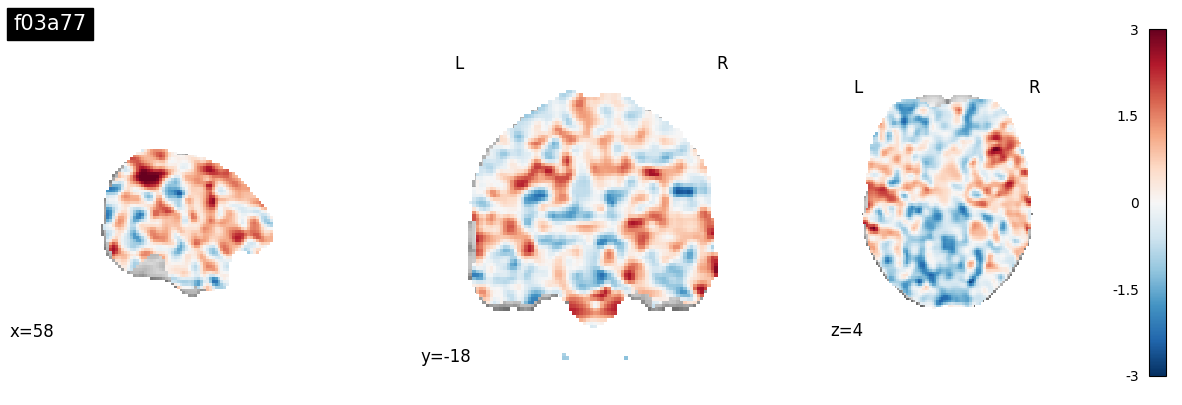

Cluster [13] - Correlation to ref [0.1245737871067292] - Medoid [a667d6c2eb7595ef1804395eaef35ac867de424b33436115884d4968961f252c]


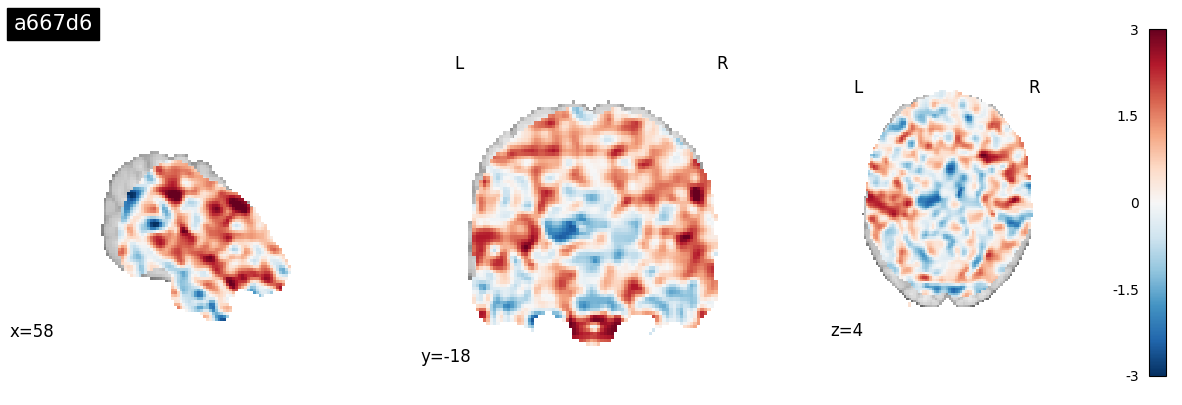

Cluster [13] - Antimedoid


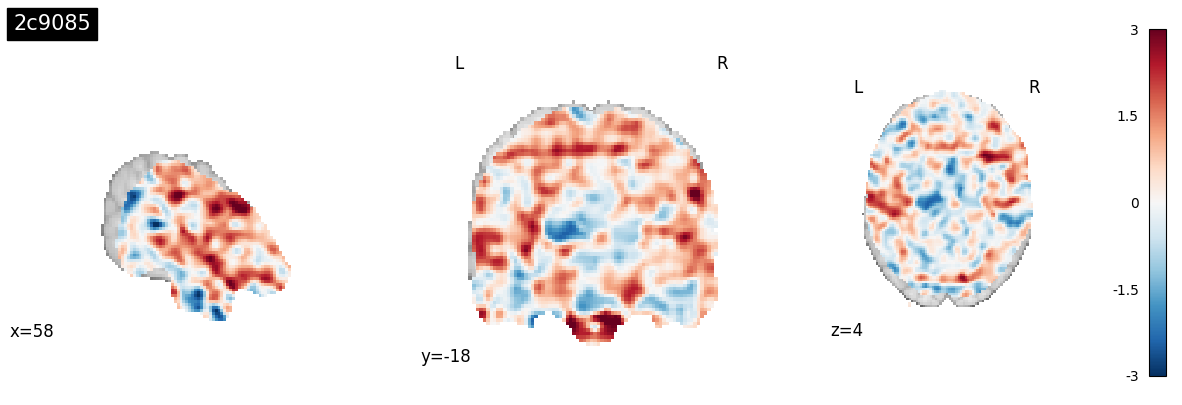

Cluster [14] - Correlation to ref [0.1079895067893493] - Medoid [4600c4fcc975d159a5e3ffbfcdd460a5f0b55113d1a74f9251f432d5c087b232]


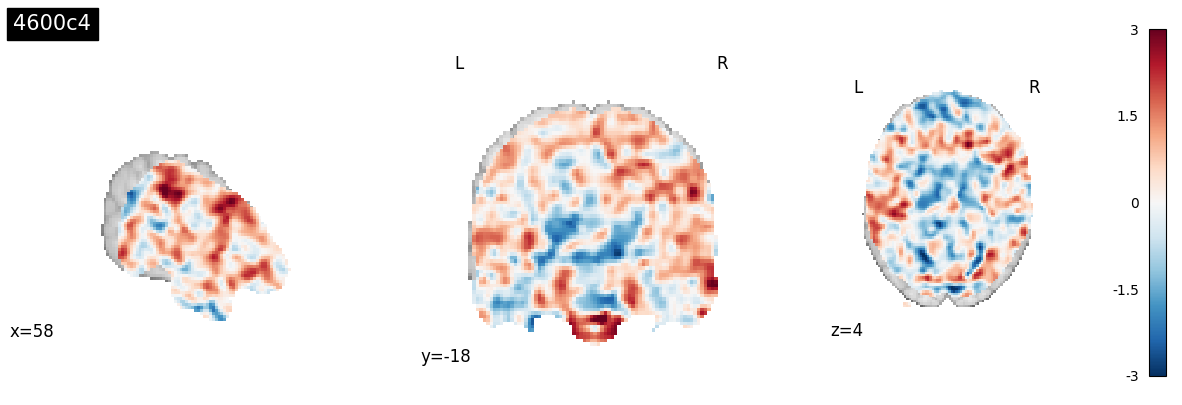

Cluster [14] - Antimedoid


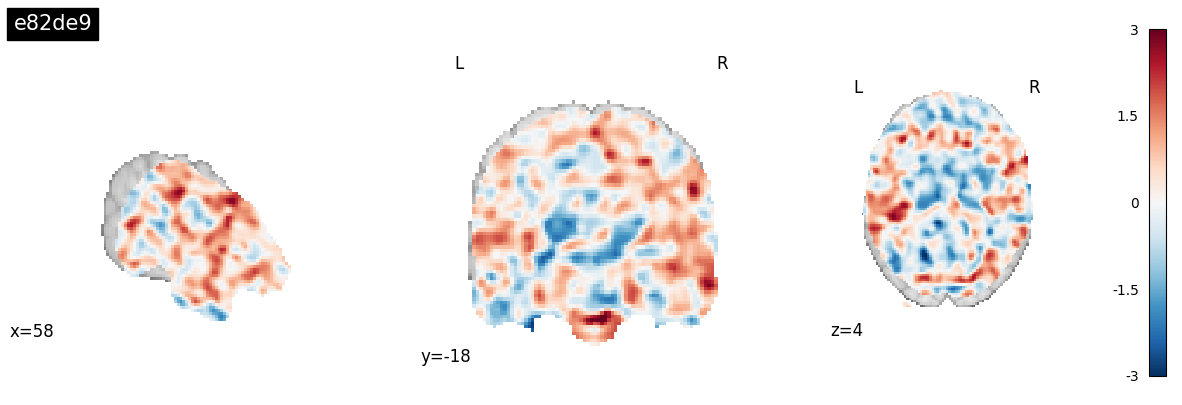

Cluster [15] - Correlation to ref [0.1206011471286155] - Medoid [60345b82a4dc2ea1cbcaace935c2d10c8ac3f86253cb511c9555c3ef934d9b87]


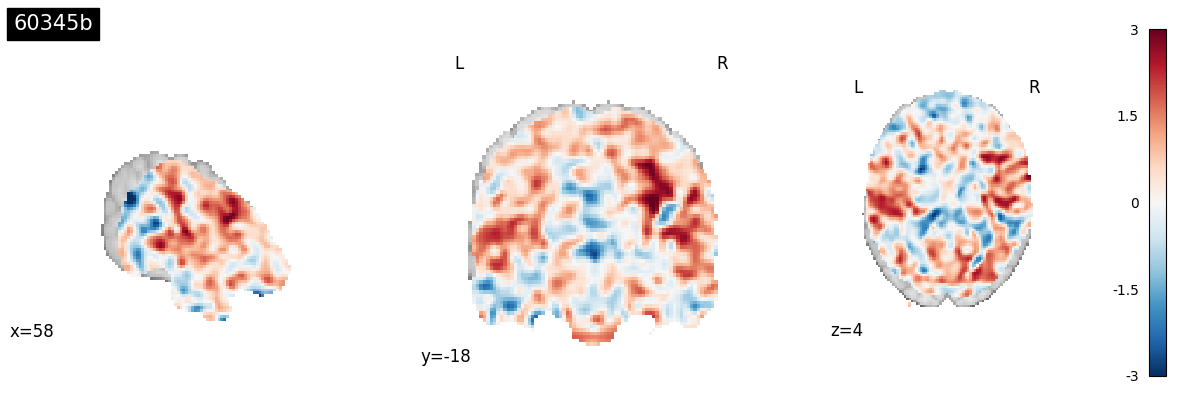

Cluster [15] - Antimedoid


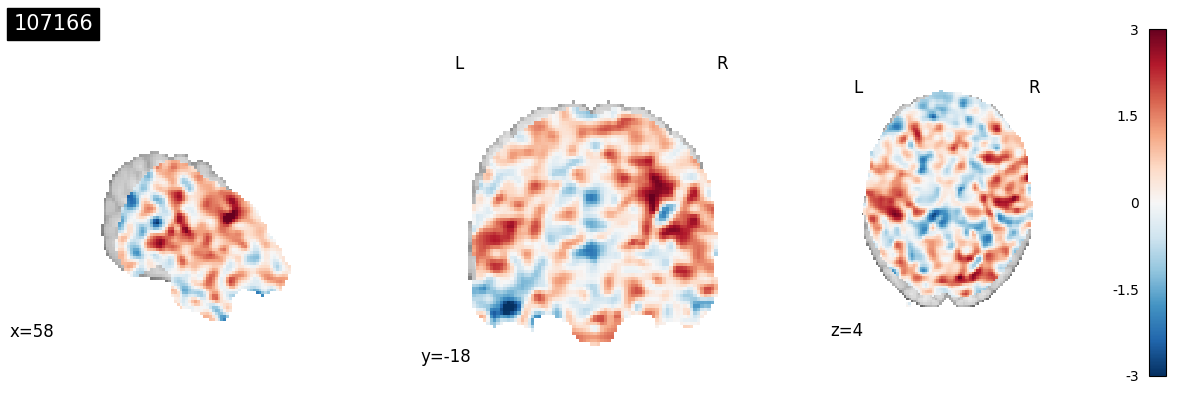

Cluster [16] - Correlation to ref [0.1238942980984554] - Medoid [359380e221abea34e0ae341737c8e313265fb5c2d668f461af441ae3cd482d37]


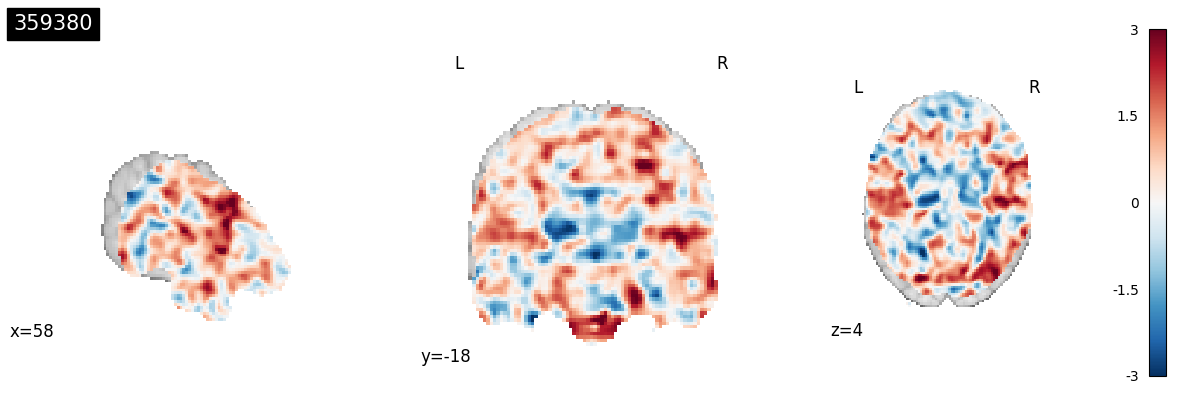

Cluster [16] - Antimedoid


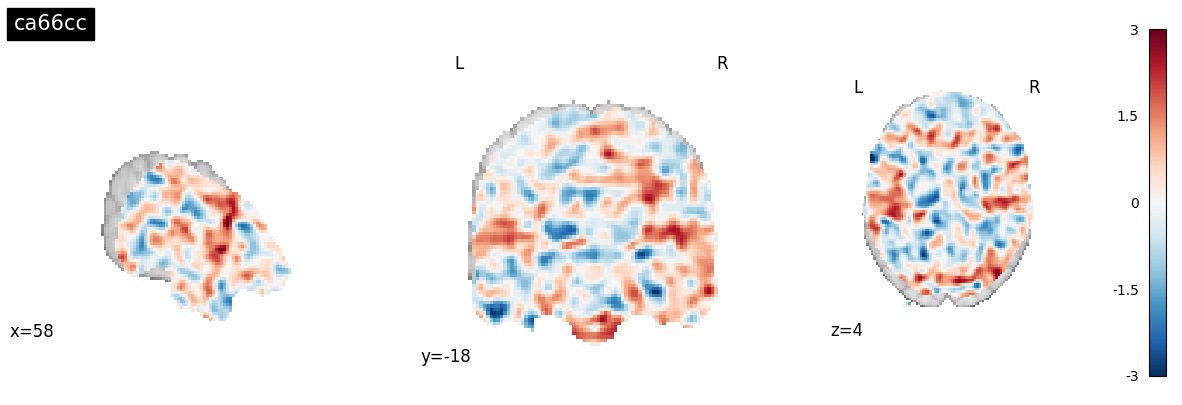

Cluster [17] - Correlation to ref [0.1128959272959913] - Medoid [352c559bba43817de26f72324dd5fecc91a946d0c3754bc915afe8b42a2afeea]


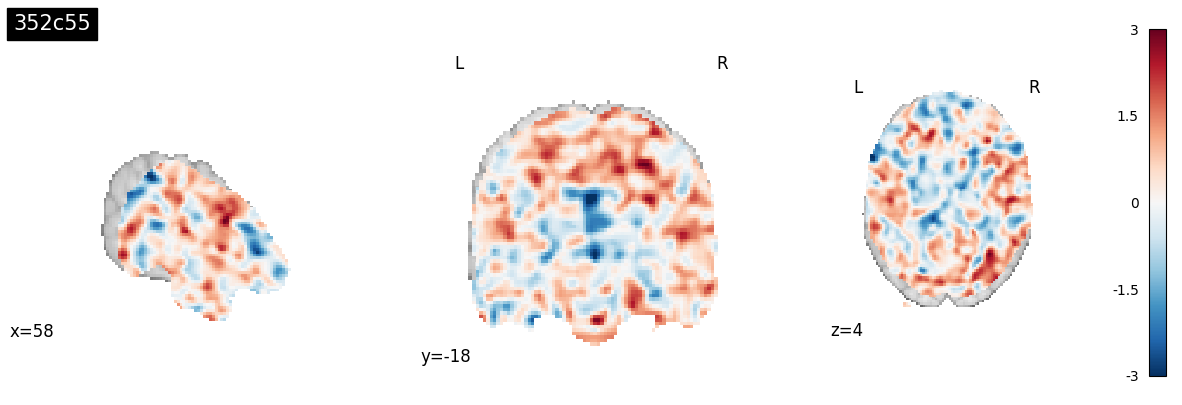

Cluster [17] - Antimedoid


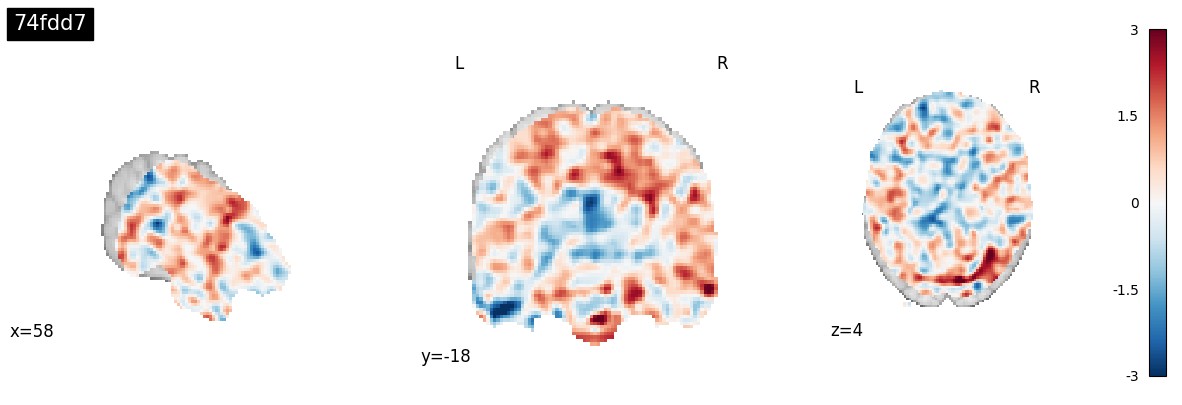

Cluster [18] - Correlation to ref [0.1029803351287892] - Medoid [6d74c30e553f35043e4e3c8a00b6fb8fe43d6fc39af64181823c564e82a8e4e0]


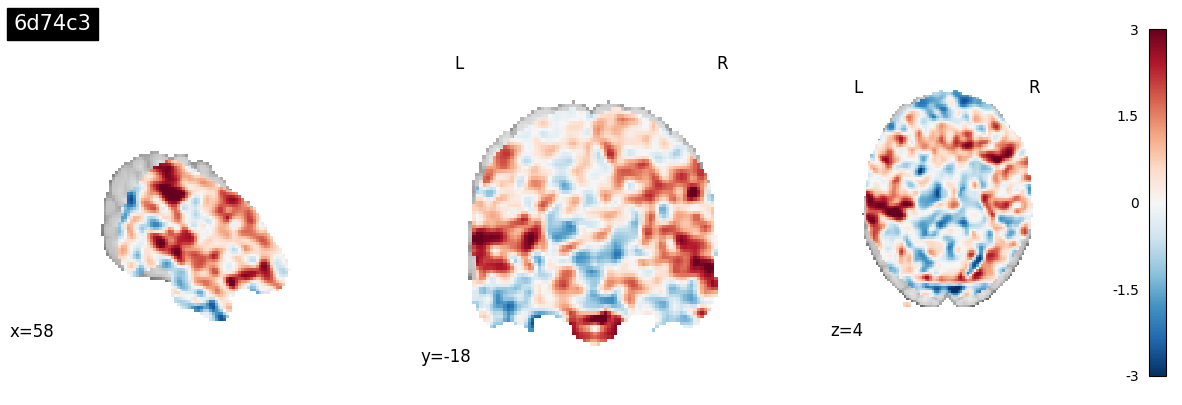

Cluster [18] - Antimedoid


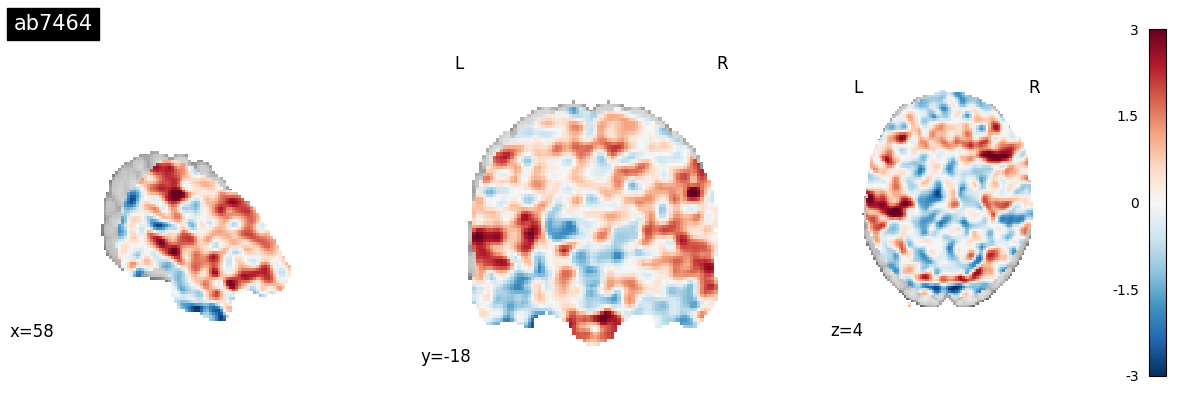

Cluster [19] - Correlation to ref [0.0788905266737204] - Medoid [f5931229acb539b750bce1203d0d22d8e04bfb46274d9ee9a66000049bf2b26b]


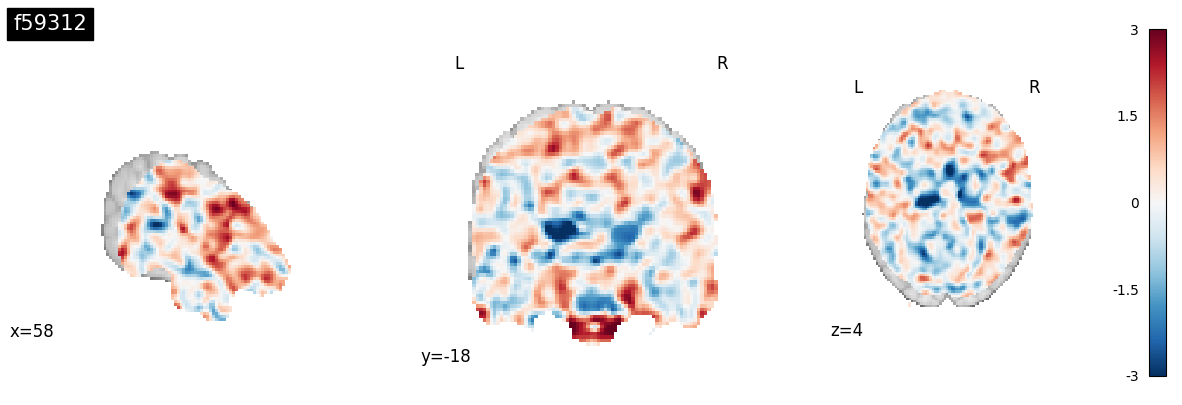

Cluster [19] - Antimedoid


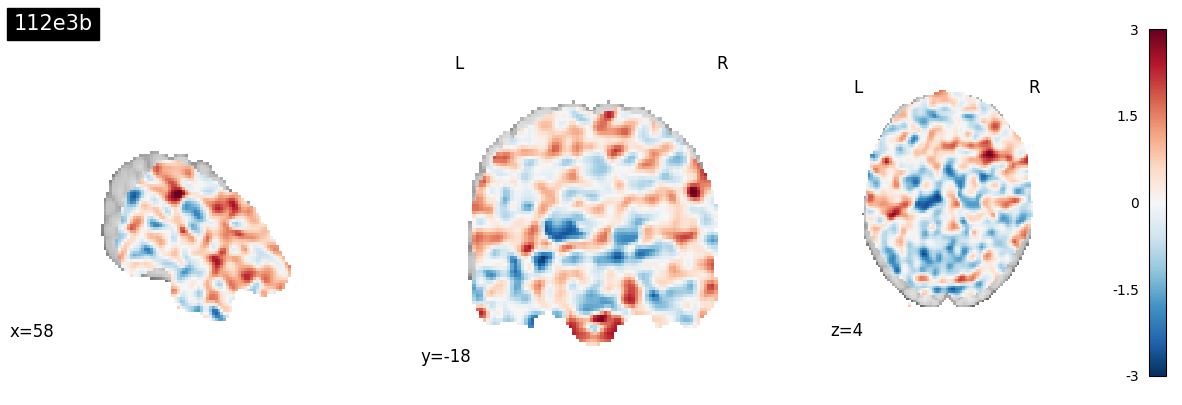

Cluster [20] - Correlation to ref [0.0743118321207522] - Medoid [6e287193f3435dbbe7e91408d5afa0dfec8cd8a0cd334e6e3fce07eab3b7932b]


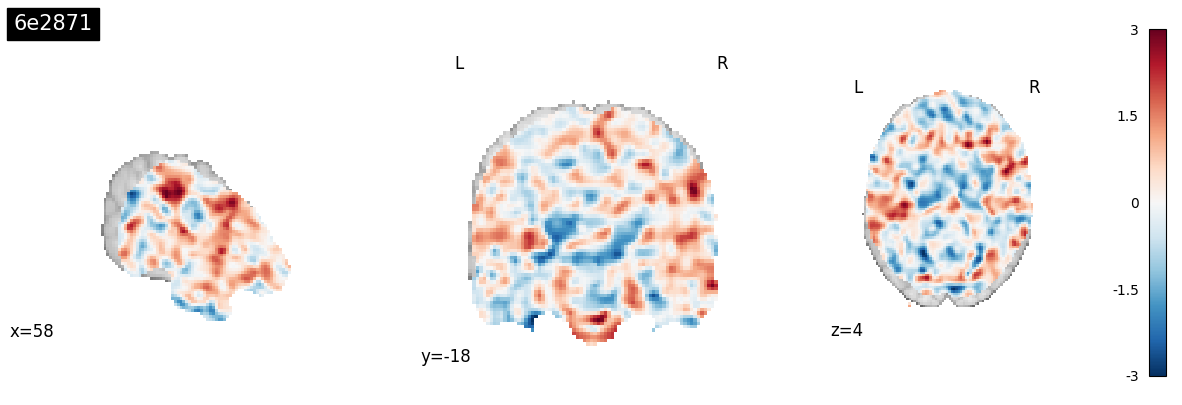

Cluster [20] - Antimedoid


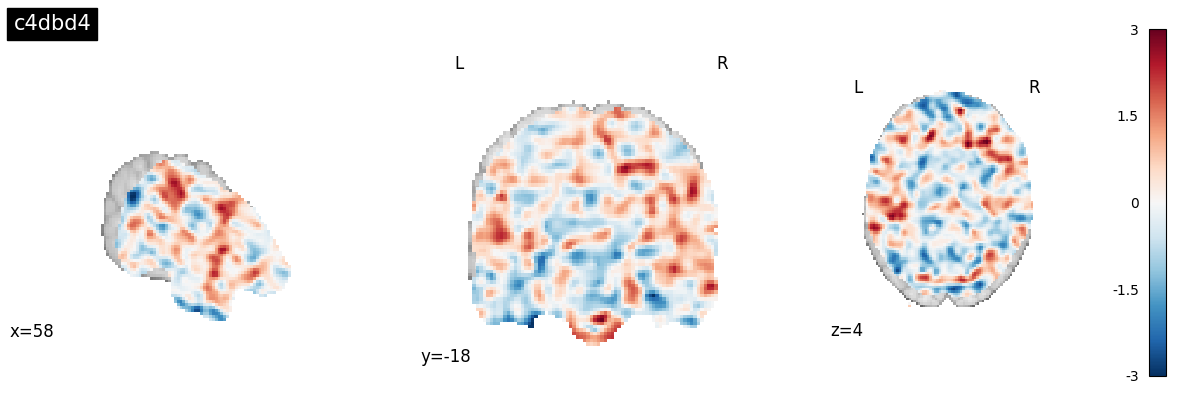

Cluster [21] - Correlation to ref [0.0899319467217606] - Medoid [0966799f924034fc695ee183c2e12aeadbdd768123223cf222ee22f36d1538ea]


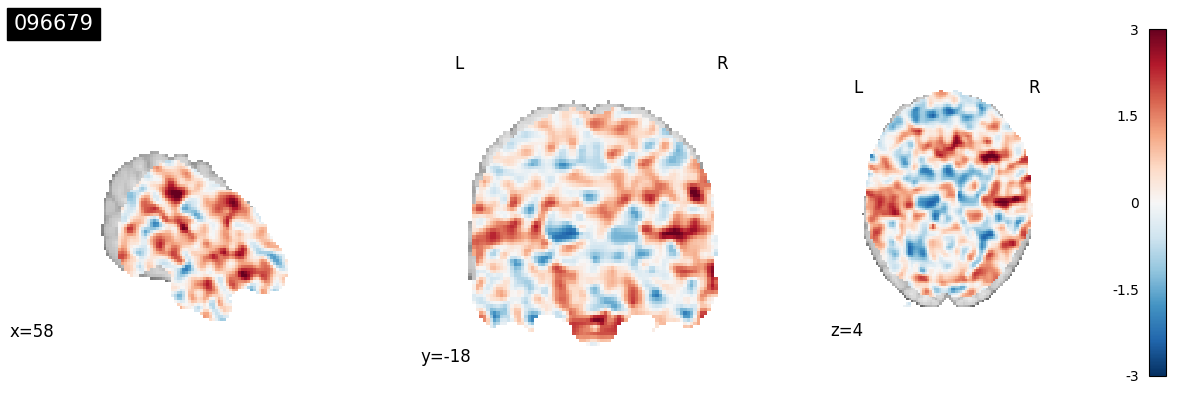

Cluster [21] - Antimedoid


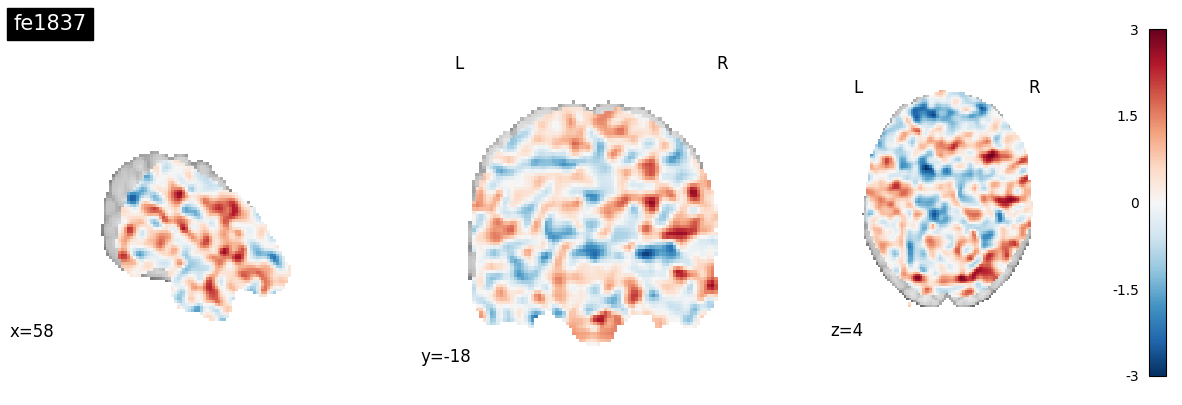

Cluster [22] - Correlation to ref [0.0910992848737833] - Medoid [289f0dde14971be4fc63590b2c1602372029958579dff0bcd2684e23d495ca07]


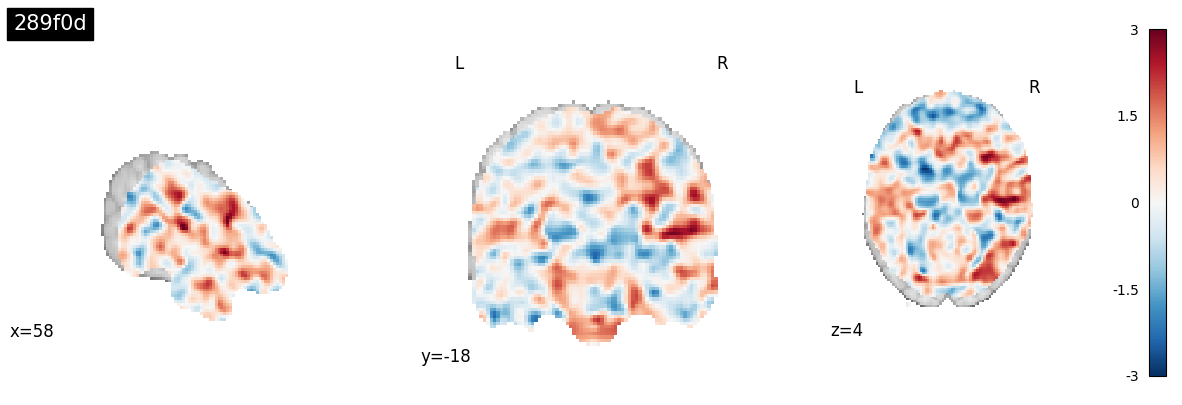

Cluster [22] - Antimedoid


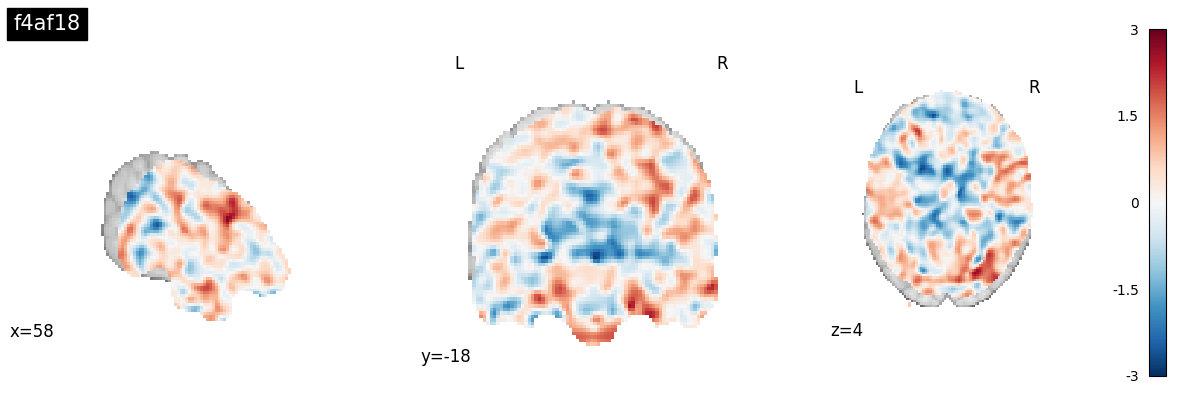

Cluster [23] - Correlation to ref [0.0469453351881243] - Medoid [0ac49b577ce8c7ace7e28634d9a3dfbcfe54188f1f1fd1b061db258f57816f62]


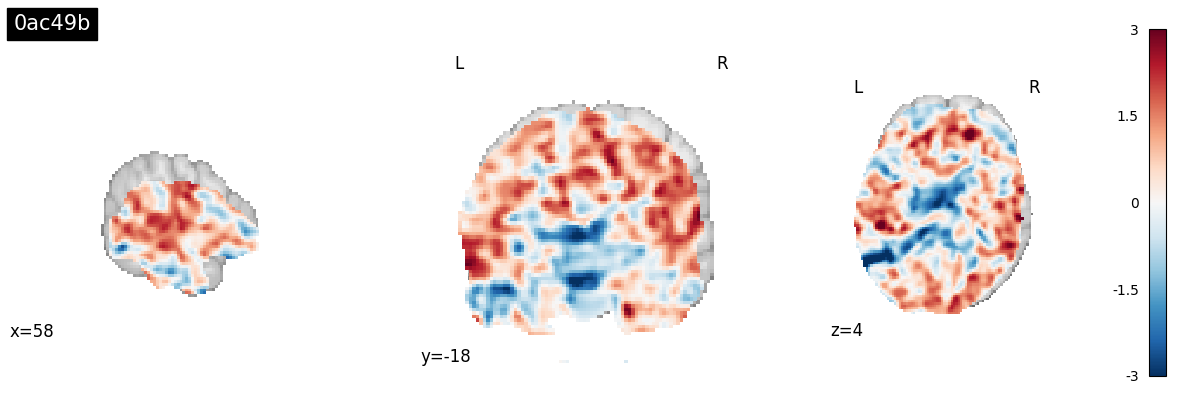

Cluster [23] - Antimedoid


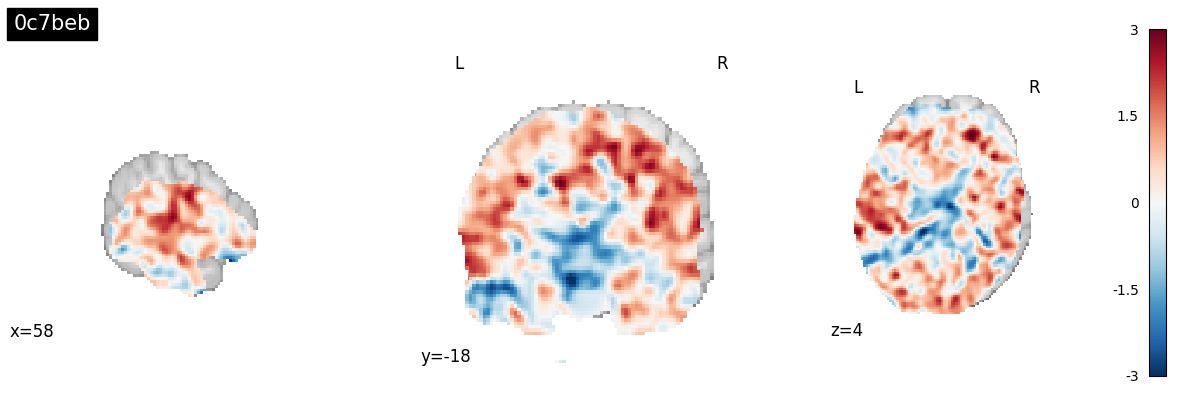

Cluster [24] - Correlation to ref [0.0533704140983135] - Medoid [65979b09a4ae73fcbea892645cb1fab2ee22a825c8c133f50880ac9ae8bed63e]


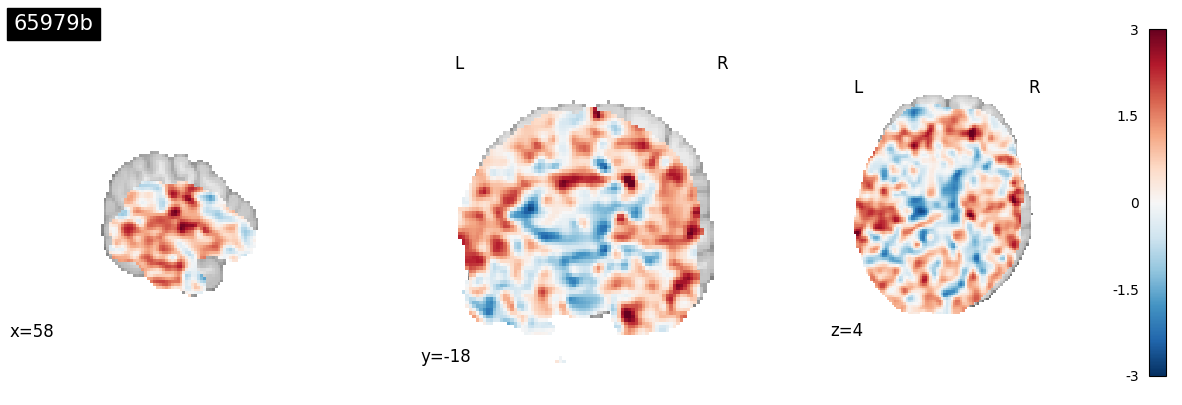

Cluster [24] - Antimedoid


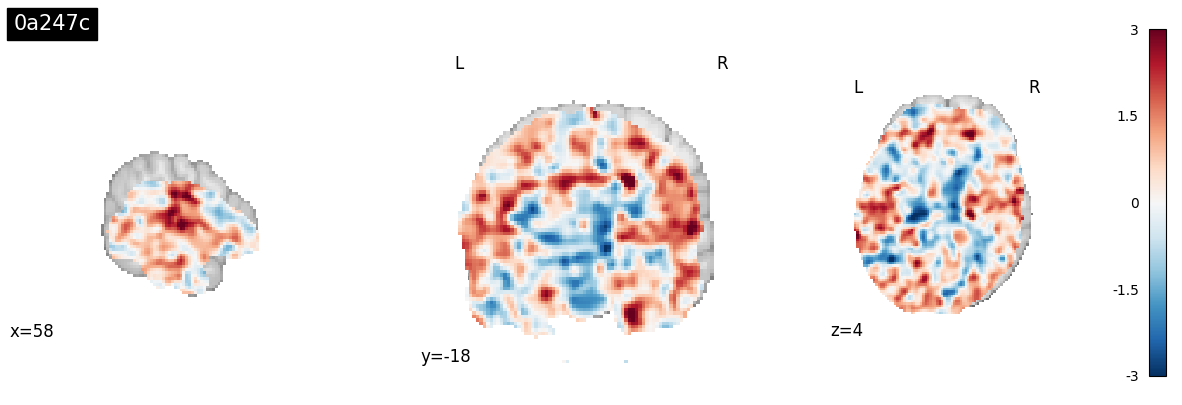

Cluster [25] - Correlation to ref [0.0399343286765829] - Medoid [88f437812e316bae6ffb6850153cc9e49ad20645c3d554099a38009513f76594]


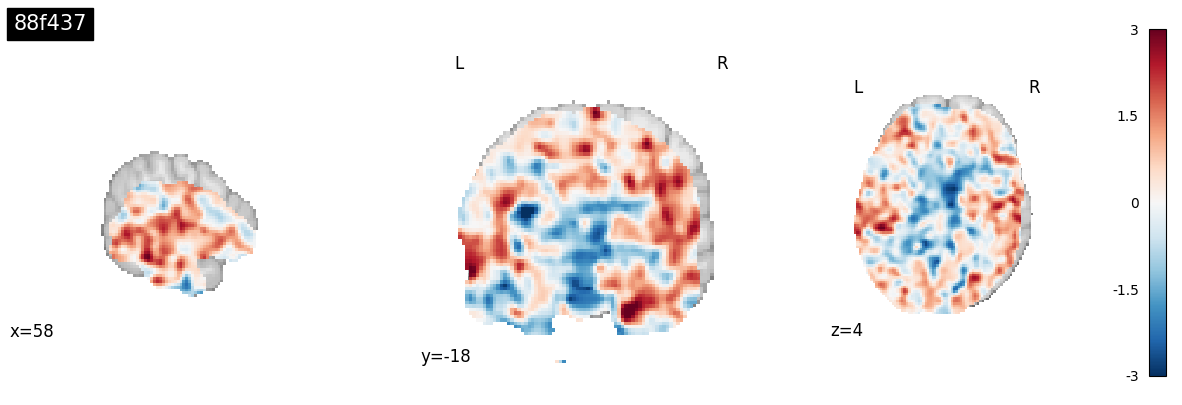

Cluster [25] - Antimedoid


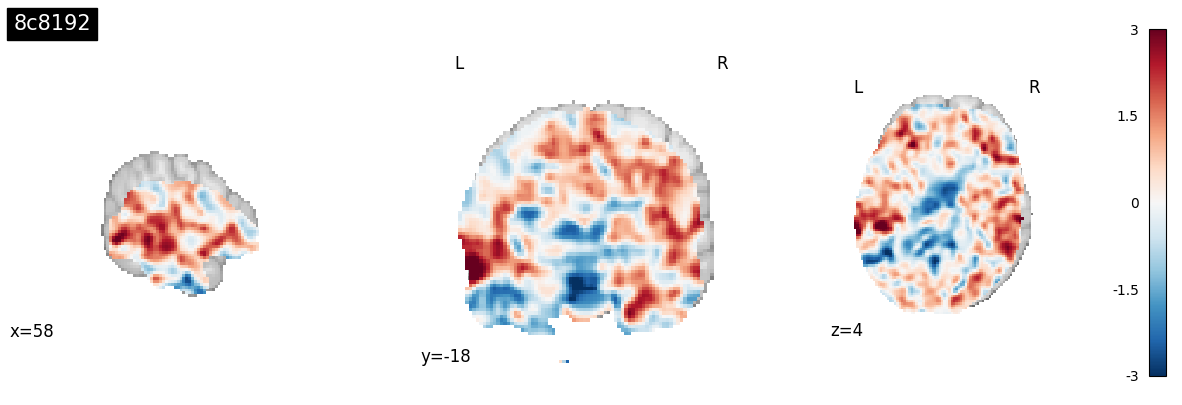

Cluster [26] - Correlation to ref [0.0411414089762366] - Medoid [786a415e4d3f1e694fba6a2db511aeadf5cd9fe117d5530a95a01881bb2340ca]


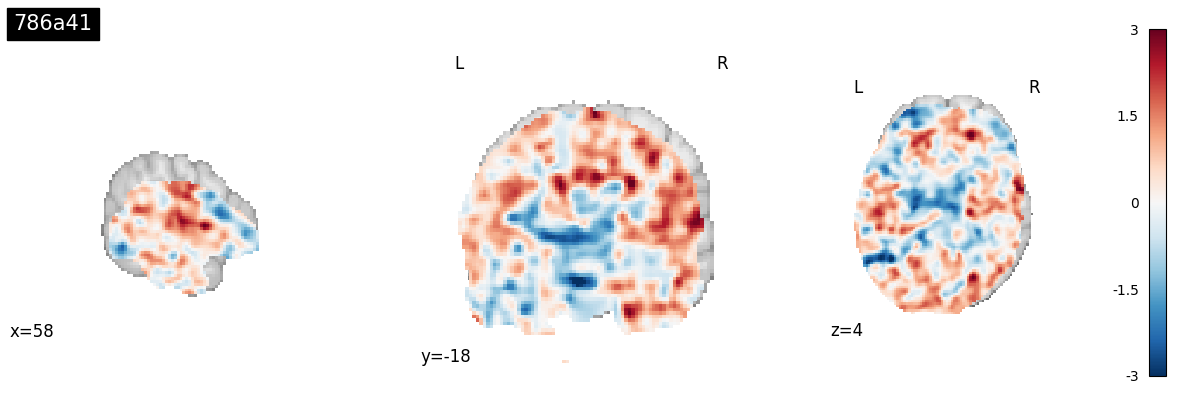

Cluster [26] - Antimedoid


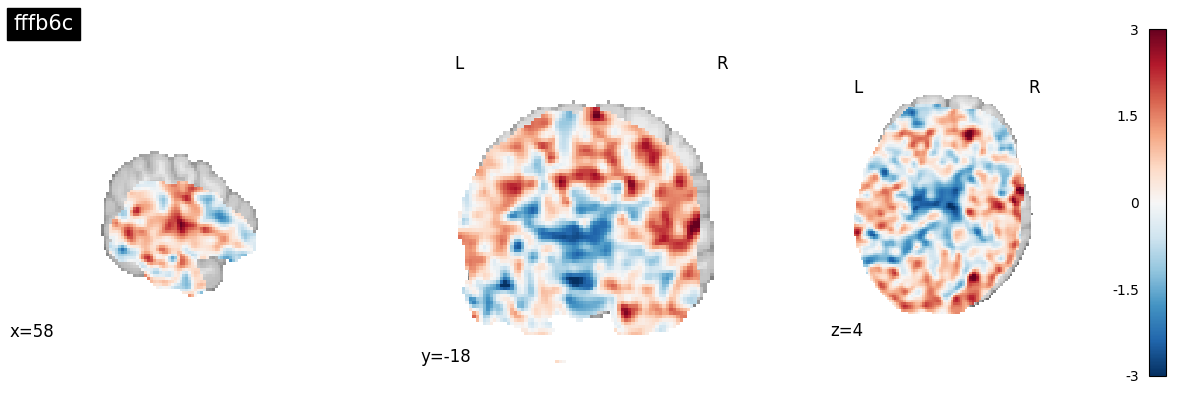

Cluster [27] - Correlation to ref [0.0289054908630646] - Medoid [8629d7362cc0387006444d0039027aa26c3a5dd396a49cc6af560e0e4679d66f]


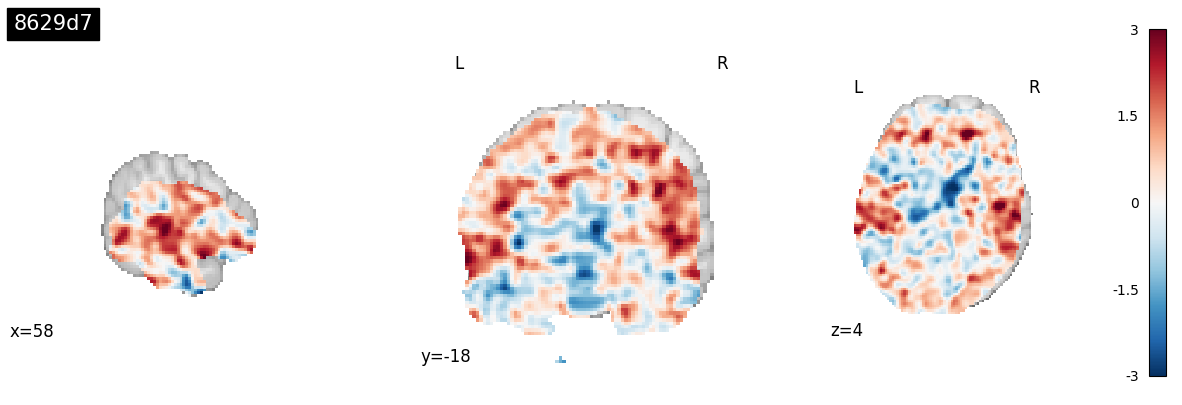

Cluster [27] - Antimedoid


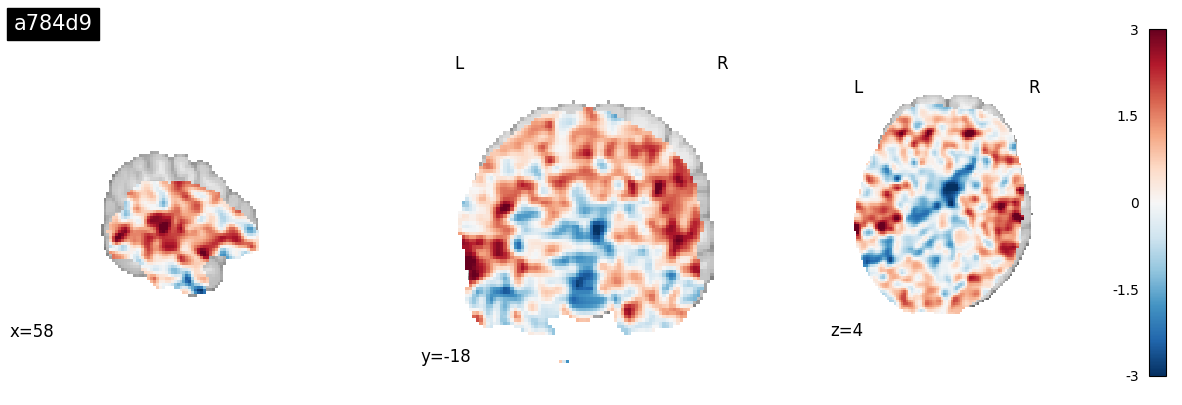

Cluster [28] - Correlation to ref [0.0405329137210479] - Medoid [b0d2c28901bf6b6488de31d85abab0e0937380729379d79c66aa7c535ac11fab]


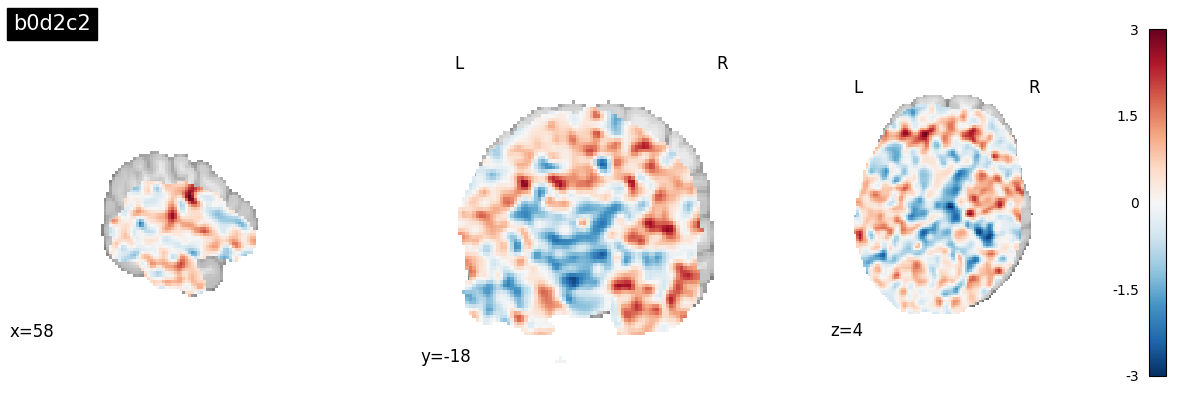

Cluster [28] - Antimedoid


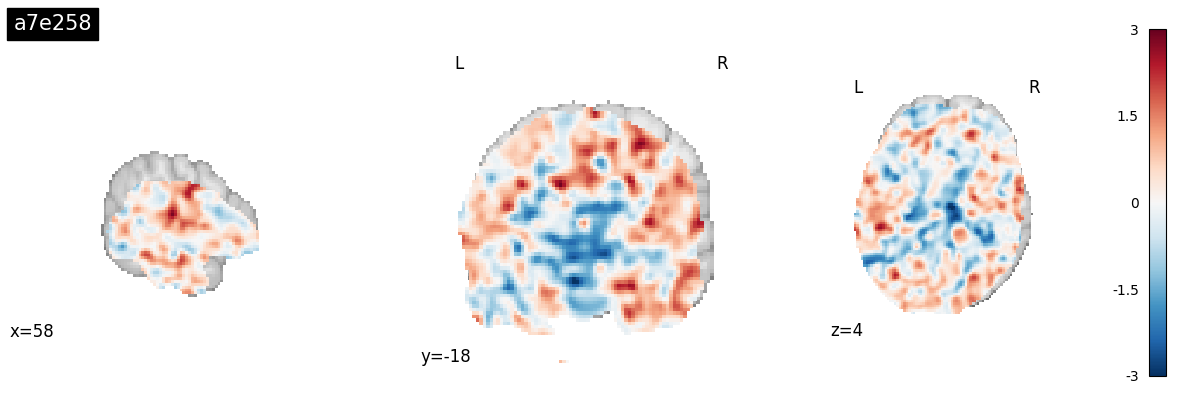

Cluster [29] - Correlation to ref [0.0387301197018542] - Medoid [b91762019573650e45a9dea0dec8b9ea452d137132e22698f093758a3ce1ad59]


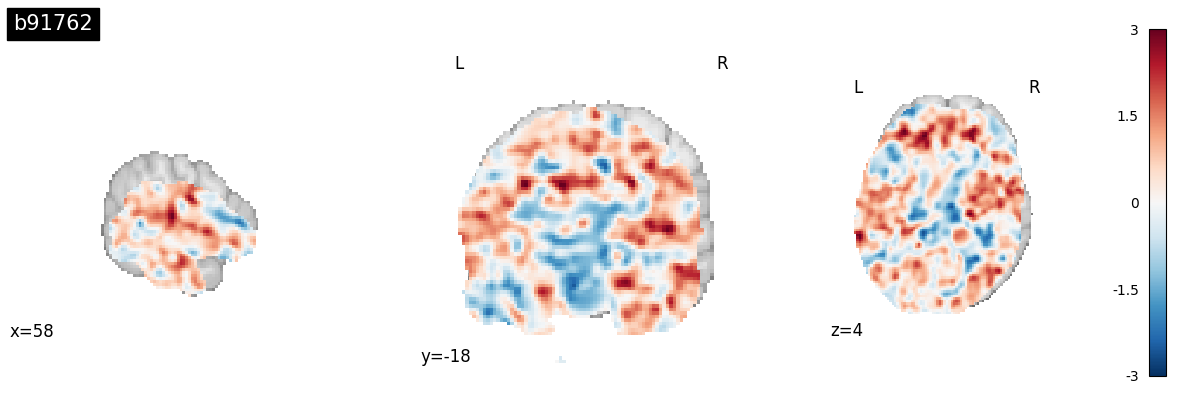

Cluster [29] - Antimedoid


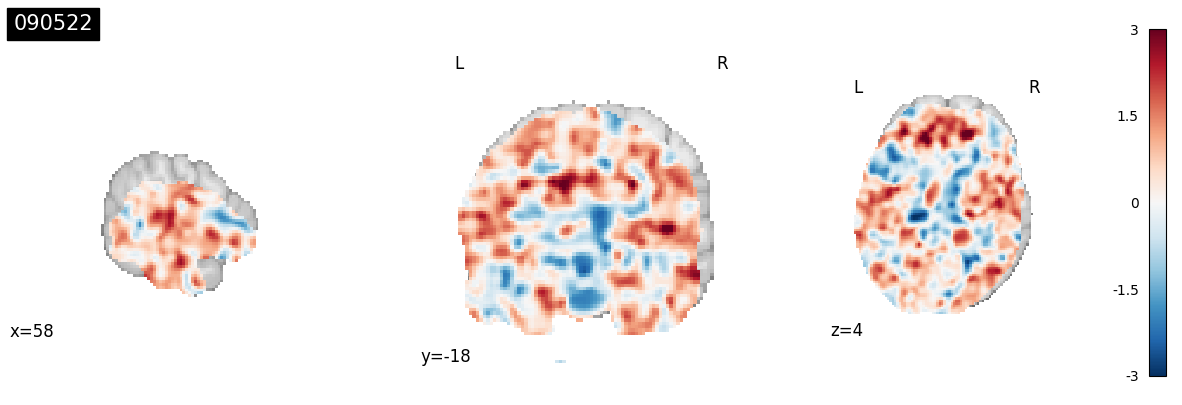

Cluster [30] - Correlation to ref [0.0195452544167644] - Medoid [d579dc431c3c766c1577f98984e2e3c059426bbb5bcd69c9fe91366f370f6a10]


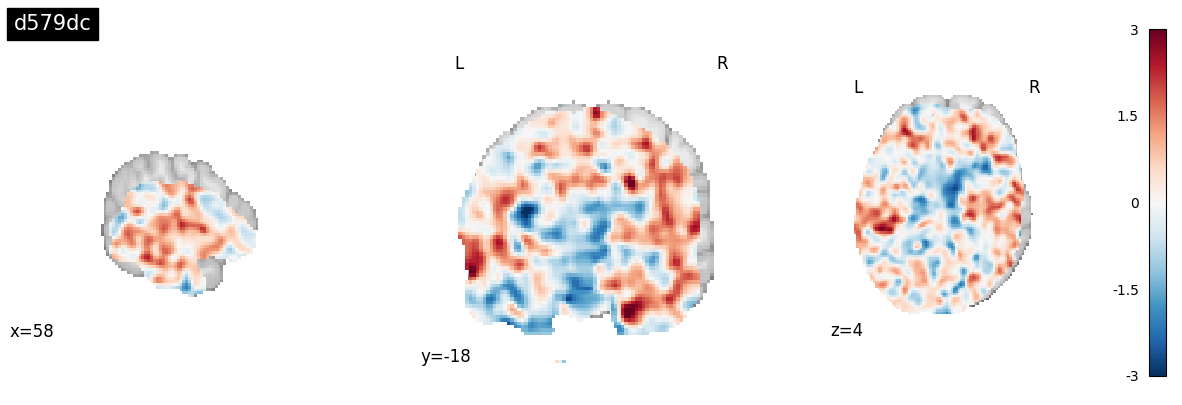

Cluster [30] - Antimedoid


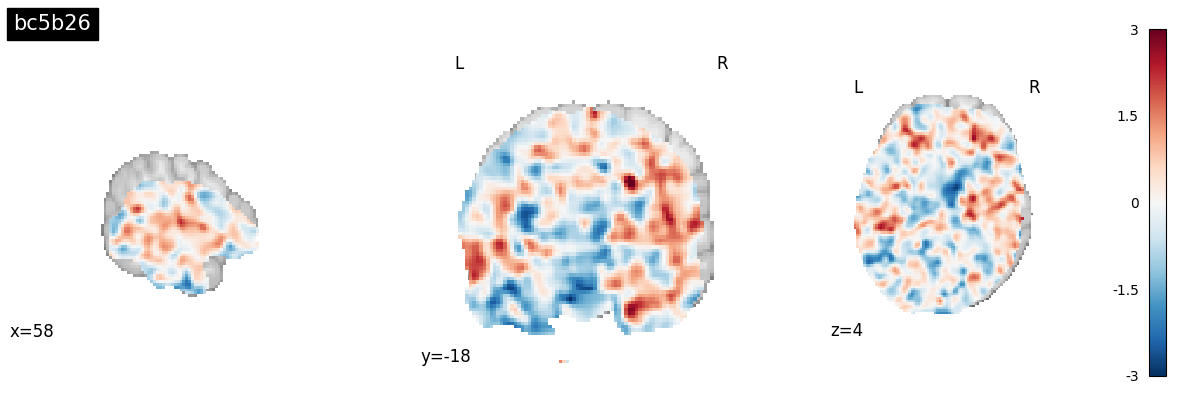

Cluster [31] - Correlation to ref [0.0072422469681612] - Medoid [2d546ceb662c089ffe4c40075da94fc0be81a3a2f2cf88c998b9366ae80ef9be]


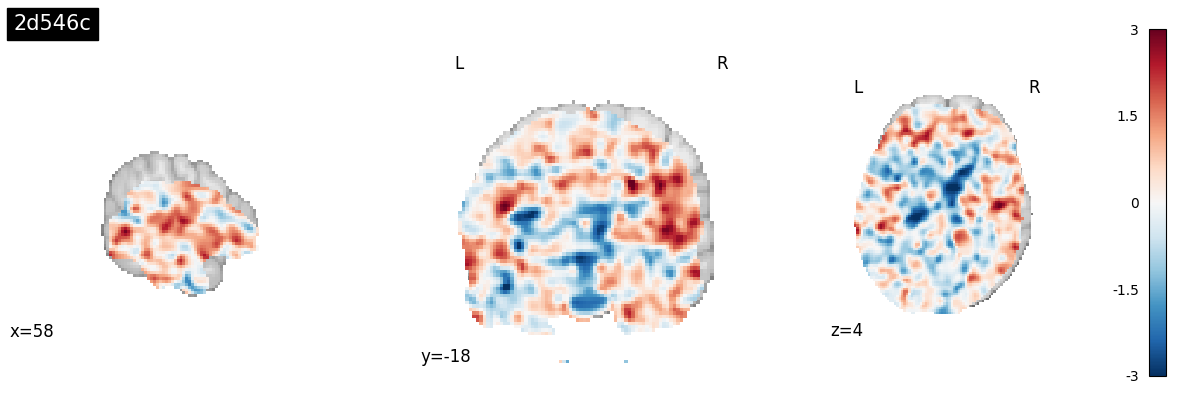

Cluster [31] - Antimedoid


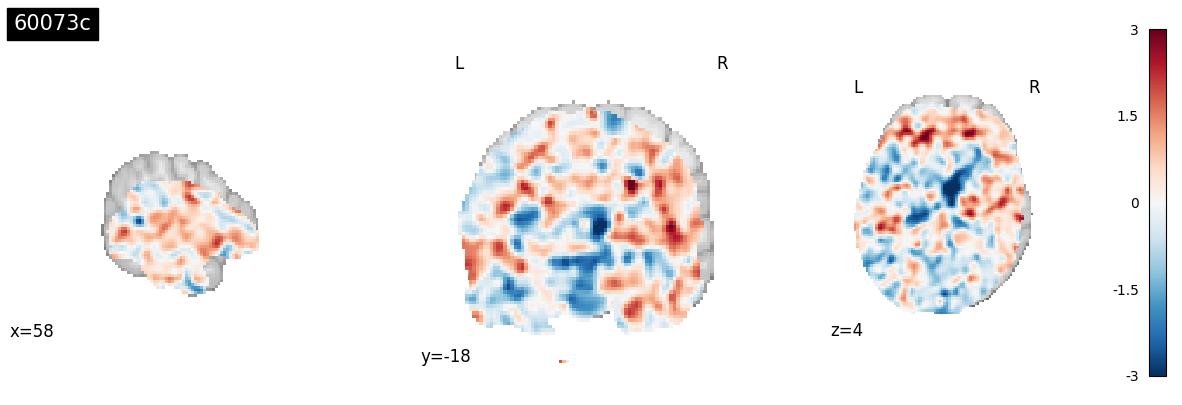

In [5]:
coords = [58, -18, 4]
for key, value in medoids.items():
    print(f"Cluster [{key}] - Correlation to ref [{dataset.loc[dataset['id'] == value, f'{corr_func}_from_ref'].values[0]}] - Medoid [{value}]")
    img_path = os.path.join(result_path, value, 'spmT_0001.nii')
    plot_brain(img_path, None, coords)
    print(f"Cluster [{key}] - Antimedoid")
    img_path = os.path.join(result_path, antimedoids[key], 'spmT_0001.nii')
    plot_brain(img_path, None, coords)

# Define Valid / Invalid clusters

In [13]:
all_clusters = clusters.unique().tolist()
# Pearson with t=0.2
# valid_clusters = [1, 2, 3, 4, 5, 6]
# invalid_clusters = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
# Sperman with t=0.2
valid_clusters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
invalid_clusters = [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
print(f"Valid clusters: {len(valid_clusters)}/{len(all_clusters)}")
print(f"Invalid clusters: {len(invalid_clusters)}/{len(all_clusters)}")

Valid clusters: 12/31
Invalid clusters: 19/31


In [14]:
print(f"Excludes {len(invalid_clusters)} clusters")

valid_ds = ds[~ds['cluster'].isin(invalid_clusters)]
valid_ds.to_csv(os.path.join(datadir, f'valid_dataset.csv'), index=False, sep=';')
print(f"Valids : {len(valid_ds)}")

invalid_ds = ds[ds['cluster'].isin(invalid_clusters)]
invalid_ds.to_csv(os.path.join(datadir, f'invalid_dataset.csv'), index=False,sep=';') 
print(f"Invalids : {len(invalid_ds)}")

Excludes 19 clusters
Valids : 744
Invalids : 257


# Plot clusters by distance from reference / mean result

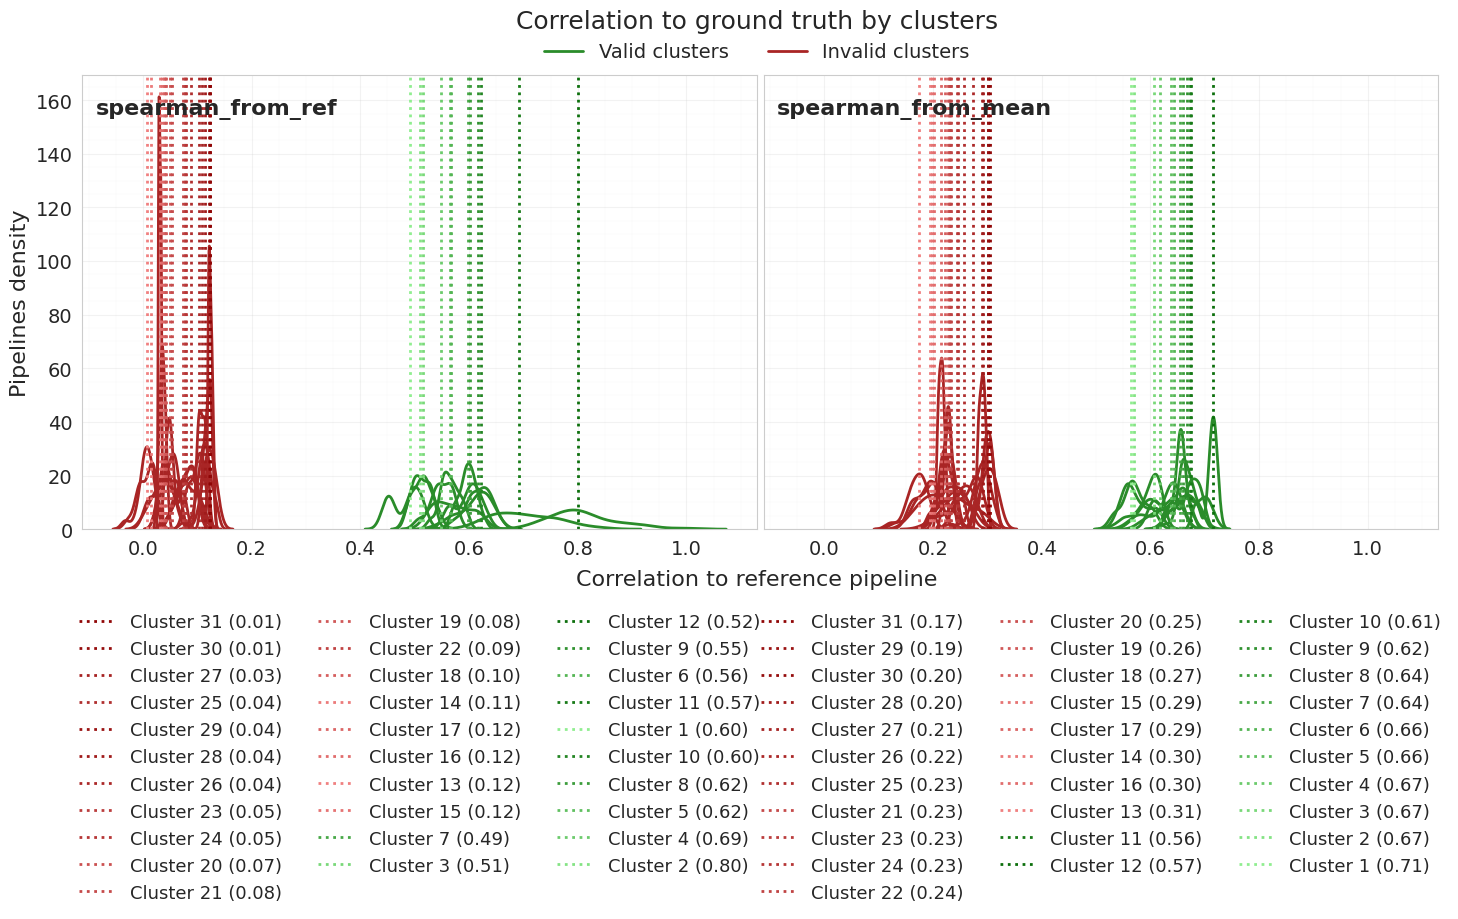

In [15]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from matplotlib.colors import LinearSegmentedColormap
import os

# Define the tasks and their respective directories
truths = [f'{corr_func}_from_ref', f'{corr_func}_from_mean']

# Create a figure with two subplots side by side, increased width and height
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True, sharex=True)
fig.suptitle('Correlation to ground truth by clusters', fontsize=18, y=0.85)

# Define colormaps for green and red shades
green_cmap = LinearSegmentedColormap.from_list('green_shades', ['lightgreen', 'darkgreen'], N=100)
red_cmap = LinearSegmentedColormap.from_list('red_shades', ['lightcoral', 'darkred'], N=100)

plt.rcParams.update({'font.size': 14})

# Use the same shades for the legend as in the plots
valid_shade = green_cmap(0.7)
invalid_shade = red_cmap(0.7)

# Create a single legend for Valid/Invalid (no cluster count)
legend_handles = [
    plt.Line2D([0], [0], color=valid_shade, lw=2, label='Valid clusters'),
    plt.Line2D([0], [0], color=invalid_shade, lw=2, label='Invalid clusters')
]
fig.legend(handles=legend_handles, loc='upper center',
           ncol=2, frameon=False, fontsize=14,
           bbox_to_anchor=(0.5, 0.83))

i = 0
for truth in truths:
    datasets = {
        'Valid': pd.read_csv(os.path.join(datadir, 'valid_dataset.csv'), delimiter=';'),
        'Invalid': pd.read_csv(os.path.join(datadir, 'invalid_dataset.csv'), delimiter=';')
    }

    # Dictionary to store stats and medoids
    stats = {}
    medoids = {}

    # Calculate stats and find medoids for each dataset
    for label, df in datasets.items():
        stats[label] = {'mean': df[truth].mean()}
        cluster_medoids = {}
        for cluster in sorted(df['cluster'].unique()):
            cluster_data = df[df['cluster'] == cluster][truth].values.reshape(-1, 1)
            distances = cdist(cluster_data, cluster_data)
            medoid_idx = np.argmin(distances.sum(axis=1))
            cluster_medoids[int(cluster)] = cluster_data[medoid_idx][0]
        medoids[label] = cluster_medoids

    # Custom legend handles for medoids (to be placed under each subplot)
    medoid_legend_handles = []

    # Plot Invalid and Valid for the current truth
    for label in ['Invalid', 'Valid']:
        df = datasets[label]
        cmap = green_cmap if label == 'Valid' else red_cmap

        cluster_color = valid_shade if label == 'Valid' else invalid_shade

        for cluster in sorted(df['cluster'].unique()):
            cluster_data = df[df['cluster'] == cluster]
            sb.kdeplot(
                cluster_data[truth],
                color=cluster_color,
                linewidth=2,
                ax=axes[i]
            )

        # Plot medoids for each cluster (colored to match cluster)
        sorted_medoids = sorted(medoids[label].items(), key=lambda x: x[1])
        for j, (cluster, medoid) in enumerate(sorted_medoids):
            medoid_color = cmap(j / len(sorted_medoids))  # Distinct shade for medoids
            axes[i].axvline(medoid, color=medoid_color, linestyle=':', linewidth=2)

        # Add medoid entries to the legend handles
        for cluster, medoid in sorted_medoids:
            medoid_color = cmap(list(medoids[label].keys()).index(cluster) / len(medoids[label]))
            medoid_legend_handles.append(plt.Line2D([0], [0],
                color=medoid_color,
                linestyle=':', lw=2, label=f'Cluster {cluster} ({medoid:.2f})'))

    # Add task name in the top left or top right of each subplot
    axes[i].text(0.02, 0.95, f'{truth}',
                     transform=axes[i].transAxes,
                     fontsize=16, fontweight='bold',
                     verticalalignment='top')

    axes[i].grid(True)

    # Add medoids legend under each subplot
    if len(medoid_legend_handles) == 4:
        cols = 2
    else:
        cols = 3

    axes[i].legend(handles=medoid_legend_handles, loc='upper center',
                   bbox_to_anchor=(0.5, -0.15), ncol=cols, frameon=False, fontsize=13)
    i += 1

# Set y-label only for the left subplot
axes[0].set_ylabel('Pipelines density', fontsize=16)

# Remove x-axis labels for both subplots
for ax in axes:
    ax.set_xlabel('')

    # Major grid
    ax.grid(True, which='major', linestyle='-', linewidth=0.75, alpha=0.25)

    # Minor ticks and grid
    ax.minorticks_on()
    ax.grid(True, which='minor', linestyle='-', linewidth=0.25, alpha=0.15)

    ax.set_axisbelow(True)  # Ensure grid is below data

# Add a single x-axis label centered below both subplots
fig.text(0.5, 0.13, 'Correlation to reference pipeline', ha='center', fontsize=16)

# Adjust layout to maximize plot width and prevent legend clipping
plt.tight_layout(rect=[0.02, 0.05, 0.98, 0.85])
plt.subplots_adjust(wspace=0.01, bottom=0.2)
plt.savefig("corr_to_ref.svg")
plt.show()


{'min': np.float64(0.4398473436925971), 'max': np.float64(1.0), 'mean': np.float64(0.6145478327576523)}
{'min': np.float64(-0.0324077962846739), 'max': np.float64(0.1417232006125478), 'mean': np.float64(0.06872348257003098)}


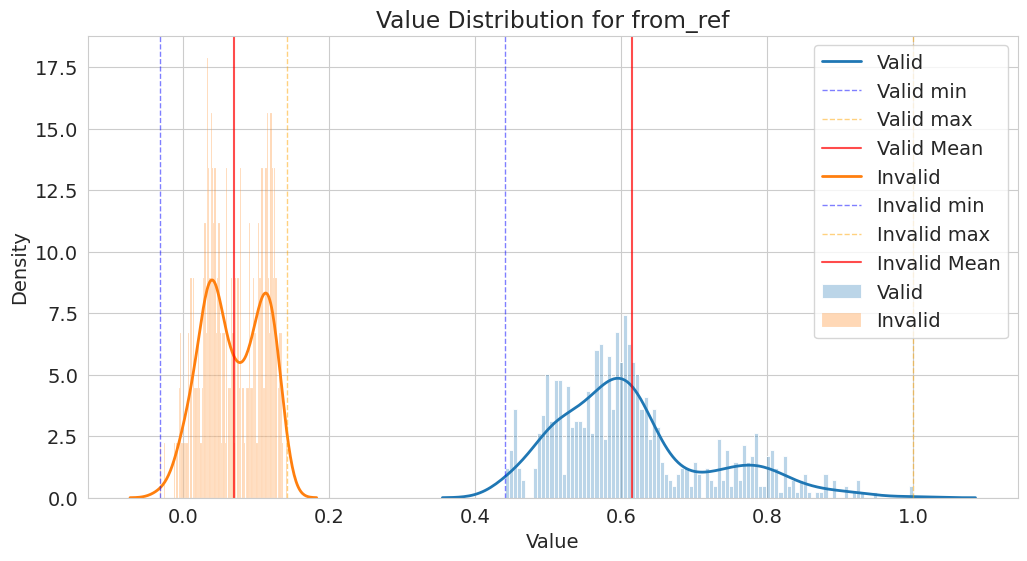

In [16]:
import seaborn as sb
# Create a dictionary to loop over the datasets
datasets = {
    'Valid': valid_ds,
    'Invalid': invalid_ds
}

# Calculate min, max, and mean for each dataset
stats = {}
for label, df in datasets.items():
    stats[label] = {
        'min': df[f'{corr_func}_from_ref'].min(),
        'max': df[f'{corr_func}_from_ref'].max(),
        'mean': df[f'{corr_func}_from_ref'].mean()
    }
    print(stats[label])

# Plot
plt.figure(figsize=(12, 6))
for label, df in datasets.items():
    sb.histplot(
        df[f'{corr_func}_from_ref'],
        bins=100,
        alpha=0.3,
        label=label,
        kde=False,
        stat='density'
    )
    sb.kdeplot(
        df[f'{corr_func}_from_ref'],
        label=label,
        linewidth=2
    )
    # Add vertical lines for min, max, and mean
    plt.axvline(stats[label]['min'], color='blue', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} min')
    plt.axvline(stats[label]['max'], color='orange', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} max')
    plt.axvline(stats[label]['mean'], color='red', linestyle='-', alpha=0.7, linewidth=1.5, label=f'{label} Mean')

plt.title('Value Distribution for from_ref')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

{'min': np.float64(0.5286143799416991), 'max': np.float64(0.7301768252606007), 'mean': np.float64(0.6484062499994349)}
{'min': np.float64(0.1225646201274203), 'max': np.float64(0.3211304444040909), 'mean': np.float64(0.24294310284108808)}


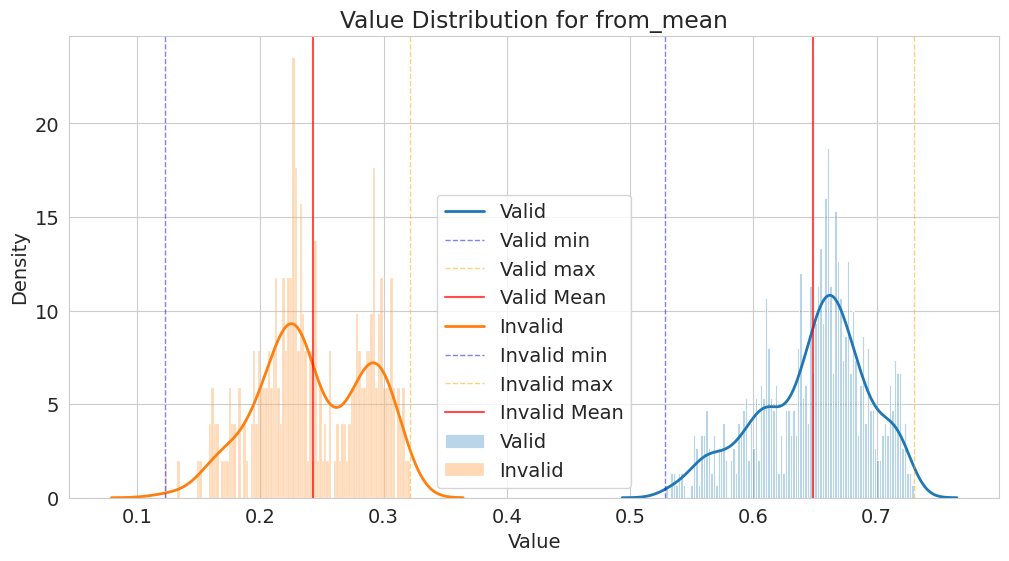

In [17]:
import seaborn as sb
# Create a dictionary to loop over the datasets
datasets = {
    'Valid': valid_ds,
    'Invalid': invalid_ds
}

# Calculate min, max, and mean for each dataset
stats = {}
for label, df in datasets.items():
    stats[label] = {
        'min': df[f'{corr_func}_from_mean'].min(),
        'max': df[f'{corr_func}_from_mean'].max(),
        'mean': df[f'{corr_func}_from_mean'].mean()
    }
    print(stats[label])

# Plot
plt.figure(figsize=(12, 6))
for label, df in datasets.items():
    sb.histplot(
        df[f'{corr_func}_from_mean'],
        bins=100,
        alpha=0.3,
        label=label,
        kde=False,
        stat='density'
    )
    sb.kdeplot(
        df[f'{corr_func}_from_mean'],
        label=label,
        linewidth=2
    )
    # Add vertical lines for min, max, and mean
    plt.axvline(stats[label]['min'], color='blue', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} min')
    plt.axvline(stats[label]['max'], color='orange', linestyle='--', alpha=0.5, linewidth=1, label=f'{label} max')
    plt.axvline(stats[label]['mean'], color='red', linestyle='-', alpha=0.7, linewidth=1.5, label=f'{label} Mean')

plt.title('Value Distribution for from_mean')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()